## 2. Exploratory Data Analysis

**Import Packages:**

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from library.sb_utils import save_file

**Load the Trap Data:**

In [2]:
#load the trap data
filepath = '../data/trap_data_cleaned.csv'
df_traps = pd.read_csv(filepath, parse_dates=['Date'])
df_traps.head()

Date                 Species  Trap   Latitude  Longitude  \
0 2007-05-29  CULEX PIPIENS/RESTUANS  T002  41.954690 -87.800991   
1 2007-05-29          CULEX RESTUANS  T002  41.954690 -87.800991   
2 2007-05-29          CULEX RESTUANS  T007  41.994991 -87.769279   
3 2007-05-29  CULEX PIPIENS/RESTUANS  T015  41.974089 -87.824812   
4 2007-05-29          CULEX RESTUANS  T015  41.974089 -87.824812   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

**Load the Grouped Trap Data:**

In [3]:
#load the grouped trap data
filepath = '../data/trap_data_grp_cleaned.csv'
df_traps_grp = pd.read_csv(filepath, parse_dates=['Date'])
df_traps_grp.head()

Date  Trap                 Species   Latitude  Longitude  \
0 2007-05-29  T002  CULEX PIPIENS/RESTUANS  41.954690 -87.800991   
1 2007-05-29  T002          CULEX RESTUANS  41.954690 -87.800991   
2 2007-05-29  T007          CULEX RESTUANS  41.994991 -87.769279   
3 2007-05-29  T015  CULEX PIPIENS/RESTUANS  41.974089 -87.824812   
4 2007-05-29  T015          CULEX RESTUANS  41.974089 -87.824812   

   NumMosquitos  NumTrapGroups  WnvPresent  NumWnvPresent  
0           1.0              1           0              0  
1           1.0              1           0              0  
2           1.0              1           0              0  
3           1.0              1           0              0  
4           4.0              1           0              0

**Load the Spray Data:**

In [4]:
#load the spray data
filepath = '../data/spray_data_cleaned.csv'
df_spray = pd.read_csv(filepath, parse_dates=['Date'])
df_spray.head()

Date        Time   Latitude  Longitude
0 2011-08-29  6:56:58 PM  42.391623 -88.089163
1 2011-08-29  6:57:08 PM  42.391348 -88.089163
2 2011-08-29  6:57:18 PM  42.391022 -88.089157
3 2011-08-29  6:57:28 PM  42.390637 -88.089158
4 2011-08-29  6:57:38 PM  42.390410 -88.088858

**Load the Weather Data:**

In [5]:
#load the weather data
filepath = '../data/weather_data_cleaned.csv'
df_weather = pd.read_csv(filepath, parse_dates=['Date'])
df_weather.head()

Date  Tmax_1  Tmin_1  Tavg_1  Tdepart  Tdew_point_1  Twet_bulb_1  \
0 2007-05-01      83      50      67       14            51           56   
1 2007-05-02      59      42      51       -3            42           47   
2 2007-05-03      66      46      56        2            40           48   
3 2007-05-04      66      49      58        4            41           50   
4 2007-05-05      66      53      60        5            38           49   

   HeatDegDay_1  CoolDegDay_1  Sunrise  ...  Wind_ResultSpeed_2  \
0             0             2      448  ...                 2.7   
1            14             0      447  ...                13.3   
2             9             0      446  ...                12.9   
3             7             0      444  ...                10.1   
4             5             0      443  ...                11.2   

   Wind_ResultDir_2  Wind_AvgSpeed_2  WeatherCode_BR_2  WeatherCode_DZ_2  \
0                25              9.6                 0                 0   
1                 2             13.4                 1                 0   
2                 6             13.2                 0                 0   
3                 7             10.4                 0                 0   
4                 7             11.5                 0                 0   

   WeatherCode_HZ_2  WeatherCode_NONE_2  WeatherCode_RA_2  WeatherCode_TS_2  \
0                 0                   1                 0                 0   
1                 1                   0                 0                 0   
2                 1                   0                 0                 0   
3                 0                   1                 0                 0   
4                 0                   1                 0                 0   

   WeatherCode_TSRA_2  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 42 columns]

**Items for mapping coordinates on Chicago map:**

In [6]:
#load Chicago Map image
map_img = plt.imread('../Images/Map.PNG');

#Set Bounding Box for the Chicago Map image
BBox = (-88, -87.5, 41.6, 42.1)

#Load Chicago Map Outlier image
map_outlier_img = plt.imread('../Images/Map_Outlier.PNG');

#Set Bounding Box for the Chicago Map Outlier image
BBox_Outlier=(-88.2,-87.5,41.6,42.5)

**Weather station coordinates:**

In [7]:
#Weather Station Locations
stn1_coordinates = (-87.933, 41.995)
stn2_coordinates = (-87.752, 41.786)

**Useful functions:**

In [8]:
#function to get proportion of traps with West Nile based on a grouping feature
def getWnvProportionData(df, group_feature):
    data = df.groupby(group_feature).agg({'NumTrapGroups':'sum','NumWnvPresent':'sum'}).reset_index()
    data['WnvProportion'] = data['NumWnvPresent'] / data['NumTrapGroups']
    return data

In [9]:
#function to draw West Nile proportion line on graphs
def drawProportionLine(ax, ppn, horizontal=True):
    if horizontal:
        ax.axhline(ppn, color='red',linestyle='--')
    else:
        ax.axvline(ppn, color='red',linestyle='--')

## 2.1 Trap Data

**Summary Stats:**

In [10]:
#summary stats
df_traps.describe().T

count       mean        std        min        25%        50%  \
Latitude      10506.0  41.841139   0.112742  41.644612  41.732984  41.846283   
Longitude     10506.0 -87.699908   0.096514 -87.930995 -87.760070 -87.694991   
NumMosquitos  10506.0  12.853512  16.133816   1.000000   2.000000   5.000000   
WnvPresent    10506.0   0.052446   0.222936   0.000000   0.000000   0.000000   

                    75%        max  
Latitude      41.954690  42.017430  
Longitude    -87.627796 -87.531635  
NumMosquitos  17.000000  50.000000  
WnvPresent     0.000000   1.000000

**Distributions:**

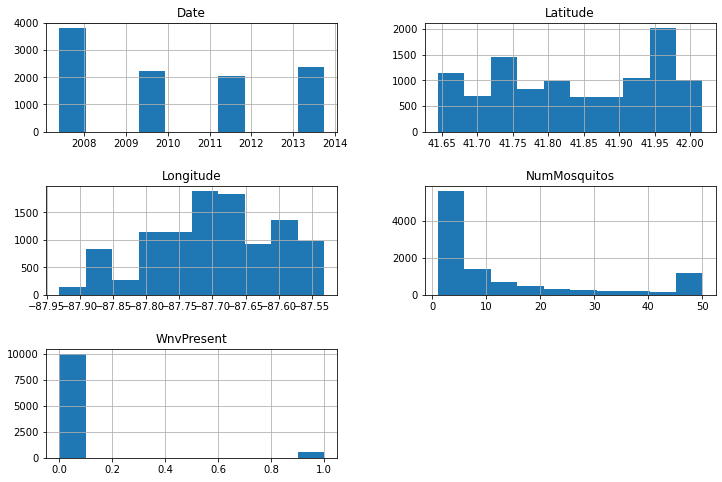

In [11]:
#plot histograms
df_traps.hist(figsize=(12,8))
plt.subplots_adjust(hspace=0.5);

**Correlation between Trap variables:**

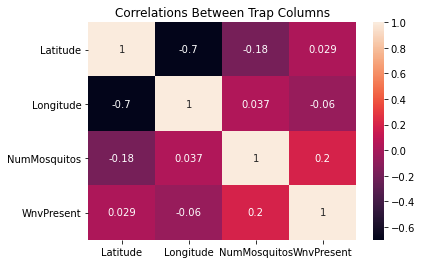

In [12]:
sns.heatmap(df_traps.corr(), annot=True);
plt.gca().set_title('Correlations Between Trap Columns');

**What proportion of traps had West Nile?**

In [13]:
wn_ppn = df_traps['WnvPresent'].sum() / df_traps.shape[0]
print('West Nile Proportion:', wn_ppn)

West Nile Proportion: 0.05244622120692937


**Average Mosquito Count by West Nile Presence:**

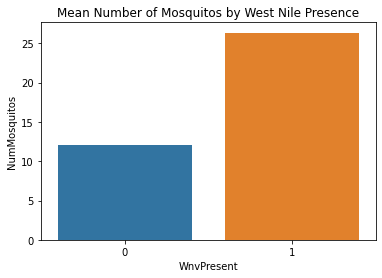

In [14]:
#plot average mosquito count for WnvPresent = 0,1
sns.barplot(data=df_traps, x='WnvPresent', y='NumMosquitos', ci=None);
plt.gca().set_title('Mean Number of Mosquitos by West Nile Presence');

As expected, it is more likely that West Nile will be present in a trap with more mosquitos.

## 2.1.1 Location

In [15]:
#Ensure each latitude pairs with only a single longitude
df_traps.groupby('Latitude')['Longitude'].nunique().sort_values(ascending=False)

Latitude
41.644612    1
41.923738    1
41.916265    1
41.918705    1
41.919343    1
            ..
41.771660    1
41.768388    1
41.766202    1
41.763733    1
42.017430    1
Name: Longitude, Length: 138, dtype: int64

**West Nile Presence by Location:**

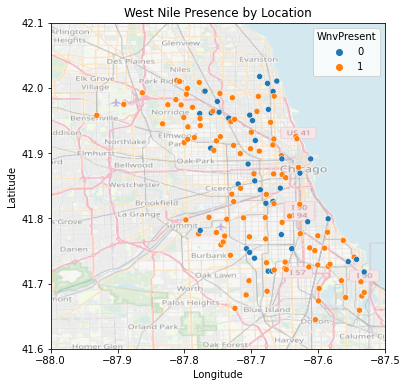

In [16]:
#Check West Nile Presence by location

fig, ax = plt.subplots(figsize = (6,6));
ax.set_title('West Nile Presence by Location')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(x=df_traps.groupby(['Longitude','Latitude'])['WnvPresent'].max().index.get_level_values(0),
                y=df_traps.groupby(['Longitude','Latitude'])['WnvPresent'].max().index.get_level_values(1), 
                hue=df_traps.groupby(['Longitude','Latitude'])['WnvPresent'].max());

West Nile may be more likely to occur at lower longitudes and lower latitudes. Look at West Nile proportion by location:

**High (>= 75th percentile) or Low West Nile Proportion by Location:**

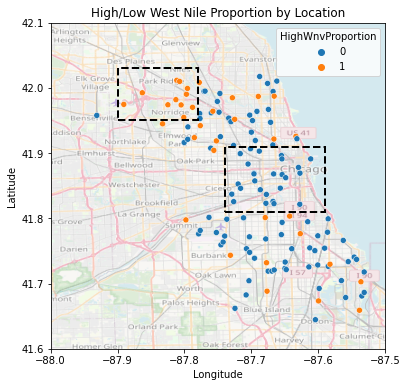

In [17]:
#Check West Nile Proportion by location
data = df_traps_grp.groupby(['Longitude','Latitude']).\
    agg({'NumTrapGroups':'sum','NumWnvPresent':'sum'})
data['WnvProportion'] = data['NumWnvPresent'] / data['NumTrapGroups']
data = data.reset_index()

data_75_percentile = data['WnvProportion'].quantile(0.75)
data['HighWnvProportion'] = 0
data.loc[data['WnvProportion'] >= data_75_percentile, 'HighWnvProportion'] = 1

fig, ax = plt.subplots(figsize = (6,6));
ax.set_title('High/Low West Nile Proportion by Location')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='HighWnvProportion');

downtown_core = patches.Rectangle((-87.74, 41.81),0.15,0.10, facecolor="none",\
                                  edgecolor='black', linewidth=2, linestyle='--')
ax.add_patch(downtown_core);

northwest_zone = patches.Rectangle((-87.9, 41.95),0.12,0.08, facecolor="none",\
                                  edgecolor='black', linewidth=2, linestyle='--')
ax.add_patch(northwest_zone);


As seen on the map above, the Northwest Zone has a high proportion of West Nile presence and the Downtown Core has a low proportion of West Nile presence. Features will be created to reflect these zones

In [18]:
#check if coordinates are inside the bounds of the provided coordinates
def coordinates_inside(longitude, latitude, min_longitude, max_longitude, min_latitude, max_latitude):
    if ((min_longitude <= longitude <= max_longitude) &
       (min_latitude <= latitude <= max_latitude)):
        return 1
    return 0
        

In [19]:
df_traps['IsDowntownCore'] = \
    df_traps.apply(lambda x : coordinates_inside(x['Longitude'],x['Latitude'], \
                             -87.74, -87.74 + 0.15, 41.81, 41.81 + 0.1), axis=1)

df_traps_grp['IsDowntownCore'] = \
    df_traps_grp.apply(lambda x : coordinates_inside(x['Longitude'],x['Latitude'], \
                             -87.74, -87.74 + 0.15, 41.81, 41.81 + 0.1), axis=1)

df_traps['IsNorthWestZone'] = \
    df_traps.apply(lambda x : coordinates_inside(x['Longitude'],x['Latitude'], \
                             -87.9, -87.9 + 0.12, 41.95, 41.95 + 0.08), axis=1)

df_traps_grp['IsNorthWestZone'] = \
    df_traps_grp.apply(lambda x : coordinates_inside(x['Longitude'],x['Latitude'], \
                             -87.9, -87.9 + 0.12, 41.95, 41.95 + 0.08), axis=1)

**Traps with Extreme West Nile Proportions:**

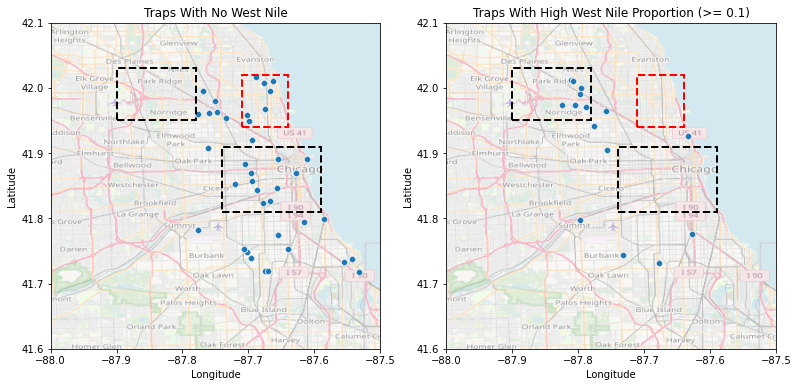

In [20]:
fig, ax = plt.subplots(1,2,figsize = (13,6));
for a in ax:
    a.set_xlim(BBox[0], BBox[1])
    a.set_ylim(BBox[2], BBox[3])
    a.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

#inspect traps with 0 West Nile
data = getWnvProportionData(df_traps_grp,'Trap')
traps_no_wnv = data[data['WnvProportion'] == 0]['Trap'].unique()
data = df_traps_grp[df_traps_grp['Trap'].isin(traps_no_wnv)]

sns.scatterplot(data=data, x='Longitude', y='Latitude', ax=ax[0]);
ax[0].set_title('Traps With No West Nile');
downtown_core = patches.Rectangle((-87.74, 41.81),0.15,0.10, facecolor="none",\
                                  edgecolor='black', linewidth=2, linestyle='--')
ax[0].add_patch(downtown_core);
northwest_zone = patches.Rectangle((-87.9, 41.95),0.12,0.08, facecolor="none",\
                                  edgecolor='black', linewidth=2, linestyle='--')
ax[0].add_patch(northwest_zone);

#inspect traps with West Nile proportion >= 0.1
data = getWnvProportionData(df_traps_grp,'Trap')
traps_high_wnv = data[data['WnvProportion'] >= 0.10]['Trap'].unique()
data = df_traps_grp[df_traps_grp['Trap'].isin(traps_high_wnv)]

sns.scatterplot(data=data, x='Longitude', y='Latitude', ax=ax[1]);
ax[1].set_title('Traps With High West Nile Proportion (>= 0.1)');

#add the previously identified regions to the map
downtown_core = patches.Rectangle((-87.74, 41.81),0.15,0.10, facecolor="none",\
                                  edgecolor='black', linewidth=2, linestyle='--')
ax[1].add_patch(downtown_core);
northwest_zone = patches.Rectangle((-87.9, 41.95),0.12,0.08, facecolor="none",\
                                  edgecolor='black', linewidth=2, linestyle='--')
ax[1].add_patch(northwest_zone);


#there is a patch in the northeast that tends to have no West nile
northeast_zone = patches.Rectangle((-87.71, 41.94),0.07,0.08, facecolor="none",\
                                  edgecolor='red', linewidth=2, linestyle='--')
ax[0].add_patch(northeast_zone);
northeast_zone = patches.Rectangle((-87.71, 41.94),0.07,0.08, facecolor="none",\
                                  edgecolor='red', linewidth=2, linestyle='--')
ax[1].add_patch(northeast_zone);

Many of the traps with extreme West Nile proportions were captured in the previously identified Northwest and Downtown Core zones. However, as seen above, there is also an area (see the red box) in the northeast that appears to have a low proportion of West Nile. A NorthEastZone feature can be created to reflect this.

In [21]:
#Create the IsNorthEastZone feature
df_traps['IsNorthEastZone'] = \
    df_traps.apply(lambda x : coordinates_inside(x['Longitude'],x['Latitude'], \
                             -87.71, -87.71 + 0.07, 41.94, 41.94 + 0.08), axis=1)

df_traps_grp['IsNorthEastZone'] = \
    df_traps_grp.apply(lambda x : coordinates_inside(x['Longitude'],x['Latitude'], \
                             -87.71, -87.71 + 0.07, 41.94, 41.94 + 0.08), axis=1)

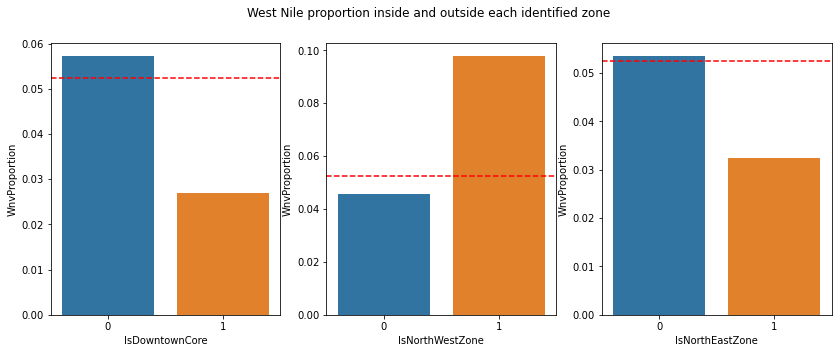

In [22]:
#West Nile proportion by identified regions
fig,ax = plt.subplots(1,3,figsize=(14,5))

data = getWnvProportionData(df_traps_grp,'IsDowntownCore')
sns.barplot(data=data, x='IsDowntownCore', y='WnvProportion', ax=ax[0]);

data = getWnvProportionData(df_traps_grp,'IsNorthWestZone')
sns.barplot(data=data, x='IsNorthWestZone', y='WnvProportion', ax=ax[1]);

data = getWnvProportionData(df_traps_grp,'IsNorthEastZone')
sns.barplot(data=data, x='IsNorthEastZone', y='WnvProportion', ax=ax[2]);

for a in ax:
    drawProportionLine(a,wn_ppn)
    
plt.suptitle('West Nile proportion inside and outside each identified zone');

In [23]:
#Create Lat_Long_Product Feature
df_traps['Lat_Long_Product'] = df_traps['Latitude'] * df_traps['Longitude']

**Trap Zones:**

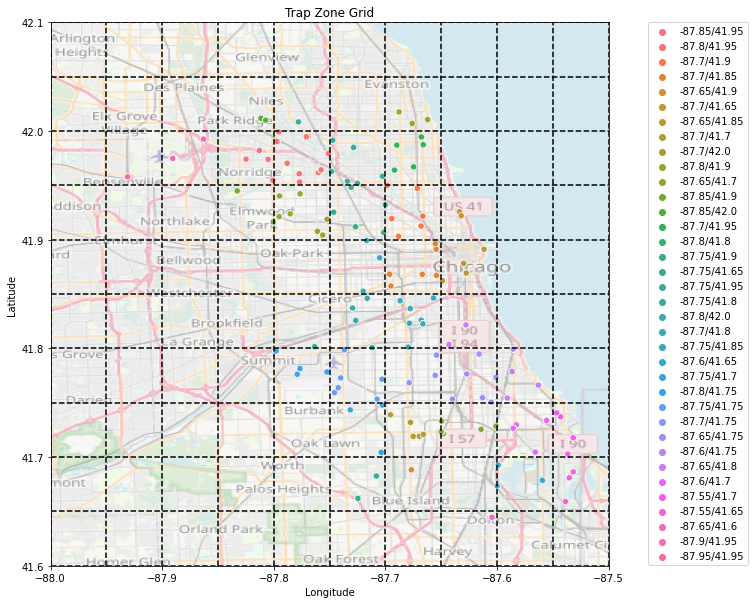

In [24]:
#create a TrapZone feature
df_traps['TrapZone'] = ''
df_traps_grp['TrapZone'] = ''
longitude_list = np.linspace(-88,-87.5,11)
latitude_list = np.linspace(41.6,42.1,11)
for i in range(len(longitude_list)):
    if i < len(longitude_list) - 1:
        for j in range(len(latitude_list)):
            if j < len(latitude_list) - 1:
                min_longitude=longitude_list[i]
                max_longitude=longitude_list[i+1]
                min_latitude=latitude_list[j]
                max_latitude=latitude_list[j+1]
                
                df_traps.loc[(df_traps['Longitude'] >= min_longitude) &
                             (df_traps['Longitude'] < max_longitude) &
                             (df_traps['Latitude'] >= min_latitude) &
                             (df_traps['Latitude'] < max_latitude),
                             'TrapZone'
                            ] = str(round(min_longitude,2)) + '/' + str(round(min_latitude,2))
                
                df_traps_grp.loc[(df_traps_grp['Longitude'] >= min_longitude) &
                             (df_traps_grp['Longitude'] < max_longitude) &
                             (df_traps_grp['Latitude'] >= min_latitude) &
                             (df_traps_grp['Latitude'] < max_latitude),
                             'TrapZone'
                            ] = str(round(min_longitude,2)) + '/' + str(round(min_latitude,2))
                
                
fig, ax = plt.subplots(figsize = (10,10));
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');
ax.set_title('Trap Zone Grid')

sns.scatterplot(data=df_traps,x='Longitude',y='Latitude', hue='TrapZone')

for i in np.linspace(-88,-87.5,11):
    ax.axvline(i, color='black', linestyle='--')
for i in np.linspace(41.6,42.1,11):
    ax.axhline(i, color='black', linestyle='--')
    
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0);

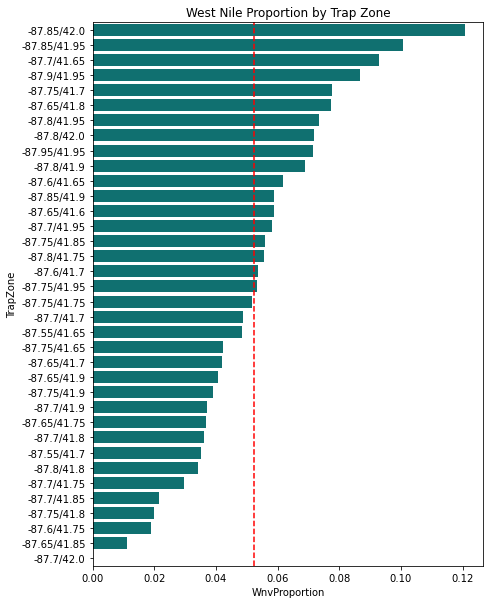

In [25]:
#West Nile Proportion by Trap Zone
data = getWnvProportionData(df_traps_grp, 'TrapZone').sort_values(by='WnvProportion',ascending=False)

fig,ax=plt.subplots(figsize=(7,10))
sns.barplot(data=data,y='TrapZone',x='WnvProportion', color='teal');
ax.set_title('West Nile Proportion by Trap Zone')

drawProportionLine(ax,wn_ppn,horizontal=False)

**Mosquito Count by Location:**

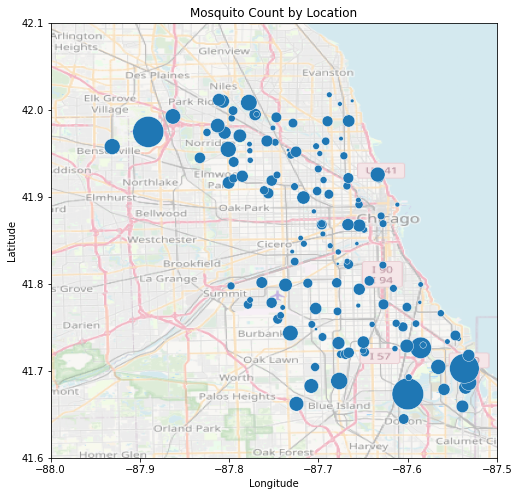

In [26]:
#How does mosquito count vary by region?
data = df_traps_grp.groupby(['Latitude','Longitude']) \
    .agg({'NumMosquitos':'mean','NumTrapGroups':'mean'}).reset_index()
data['TotalMosquitos'] = data['NumMosquitos'] * data['NumTrapGroups']

fig, ax = plt.subplots(figsize=(8,8));
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');
ax.set_title('Mosquito Count by Location');

sns.scatterplot(data=data, x='Longitude',y='Latitude',size='TotalMosquitos', sizes=(1,1000));
ax.get_legend().remove();

There do appear to be some latitude/longitude regions (Northwest, Southeast) where more mosquitos are caught. However, these just may be traps that are checked more often. How does this compare to the number of times each trap was checked?.

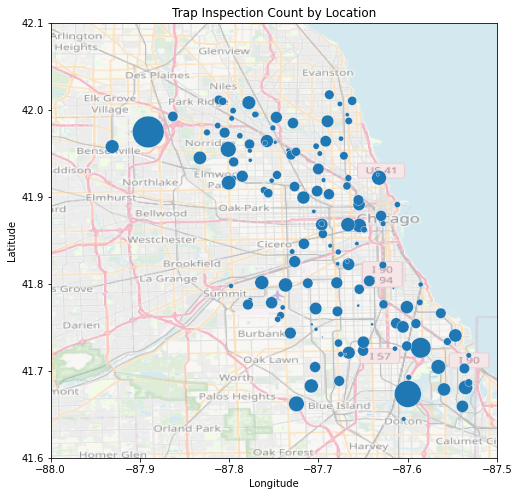

In [27]:
#Are latitude/longitude differences in mosquito count due to traps in certain regions being checked more than others
data = df_traps.groupby('Trap').agg({'Latitude':'first','Longitude':'first','Date':'count'}).reset_index()
data = data.rename(columns={'Date':'Count'})

fig, ax = plt.subplots(figsize=(8,8));
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');
ax.set_title('Trap Inspection Count by Location');

sns.scatterplot(data=data, x='Longitude',y='Latitude',size='Count', sizes=(1,1000));
ax.get_legend().remove();

It does not appear that the extreme mosquito counts in the Northwest and Southeast are related to the number of unique days that traps were checked. This pattern may be due to spraying (spray will be examined below)

## 2.1.2 Annual Variation

**West Nile Proportion by Year:**

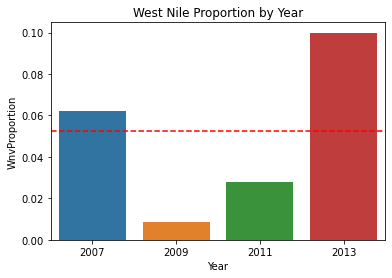

In [28]:
df_traps['Year'] = df_traps['Date'].dt.year.astype('category')
df_traps_grp['Year'] = df_traps_grp['Date'].dt.year.astype('category')

data = getWnvProportionData(df_traps_grp,'Year')
   
sns.barplot(data=data, x='Year',y='WnvProportion');
drawProportionLine(plt.gca(),wn_ppn)
plt.gca().set_title('West Nile Proportion by Year');

West Nile presence was much higher in 2007 and 2013. Add a year column to make comparisons by year. Was this due to mosquito count?


**Total NumMosquitos by Year:**

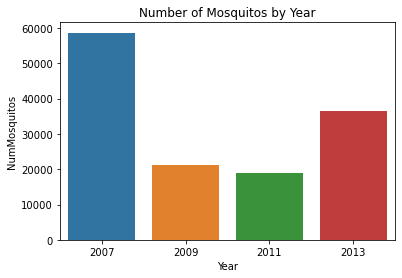

In [29]:
data = df_traps.groupby('Year')['NumMosquitos'].sum().reset_index()
sns.barplot(data=data,x='Year',y='NumMosquitos');
plt.gca().set_title('Number of Mosquitos by Year');

The higher West Nile presence in 2007, 2013 can likely be explained by higher mosquito numbers. The variance in mosquito numbers may be due to weather conditions. This will be examined below.

## 2.1.3 Seasonality

**Seasonal trends in West Nile Proportion:**

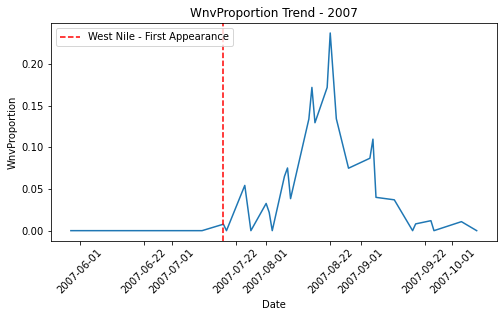

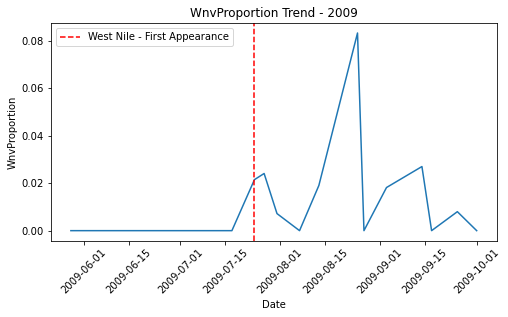

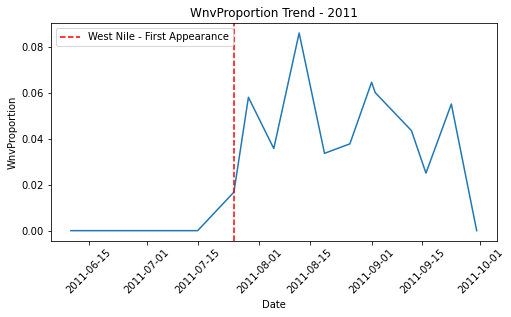

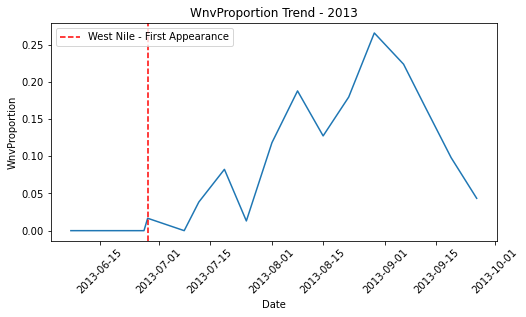

In [30]:
#look for West Nile proportion seasonality

data = getWnvProportionData(df_traps_grp,'Date')

for year in df_traps_grp['Year'].unique(): 
    year_data = data[data['Date'].dt.year == year]
    fig, ax = plt.subplots(figsize=(8,4))
    sns.lineplot(data=year_data, x='Date', y='WnvProportion')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title('WnvProportion Trend - ' + str(year))
    
    #first day where West Nile was present
    first_wnv_date = year_data[year_data['WnvProportion'] > 0]['Date'].min()
    ax.axvline(first_wnv_date, color='red',linestyle='dashed', label='West Nile - First Appearance')
    plt.legend(loc='upper left')

Years with a higher WnvProportion, tended to have a higher daily mosquito count and did not experience as much of a drop off in mosquito numbers in August.

**First Occurrence of West Nile by Year:**

In [31]:
df_traps.groupby(['Year','WnvPresent'])['Date'].min()

Year  WnvPresent
2007  0            2007-05-29
      1            2007-07-18
2009  0            2009-05-28
      1            2009-07-24
2011  0            2011-06-10
      1            2011-07-25
2013  0            2013-06-07
      1            2013-06-28
Name: Date, dtype: datetime64[ns]

West Nile tended to show up after mid July. In 2013, the first West Nile finding was in June. However, looking at the line graphs above, the West Nile proportion was very low in June and dipped back down to 0 before increasing again in mid July. Therefore, in general, West Nile season appears to start around July 15th. A feature (IsInSeason) can be designed to reflect this. 

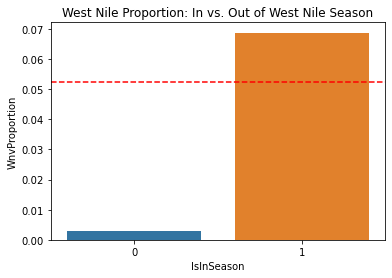

In [32]:
#Create IsInSeason feature
df_traps['IsInSeason'] = 0
df_traps_grp['IsInSeason'] = 0
for year in df_traps['Year'].unique():
    season_start = dt.datetime(year,7,15)
    df_traps.loc[(df_traps['Year'] == year) & (df_traps['Date'] >= season_start), 'IsInSeason'] = 1
    df_traps_grp.loc[(df_traps_grp['Year'] == year) & (df_traps_grp['Date'] >= season_start), 'IsInSeason'] = 1
    
data = getWnvProportionData(df_traps_grp,'IsInSeason')
sns.barplot(data=data,x='IsInSeason',y='WnvProportion');
drawProportionLine(plt.gca(),wn_ppn)
plt.gca().set_title('West Nile Proportion: In vs. Out of West Nile Season');

**West Nile by Month:**

In [33]:
#Introduce a month column
df_traps['Month'] = df_traps['Date'].dt.month.astype('category')
df_traps_grp['Month'] = df_traps_grp['Date'].dt.month.astype('category')

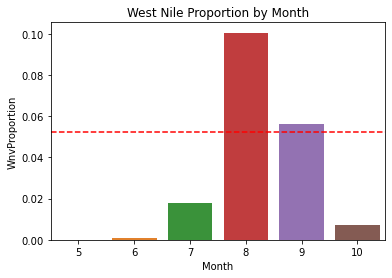

In [34]:
#look at West Nile proportion by month
data = df_traps_grp.groupby('Month').agg({'NumWnvPresent':'sum','NumTrapGroups':'sum'})
data = data['NumWnvPresent'] / data['NumTrapGroups']
data = data.reset_index().rename(columns={0:'WnvProportion'})

sns.barplot(data=data,x='Month',y='WnvProportion');
drawProportionLine(plt.gca(),wn_ppn)
plt.gca().set_title('West Nile Proportion by Month');

August appears to be by far the worst month for West Nile. There is also significant West Nile in September. There were no cases in May.

**West Nile by Week:**

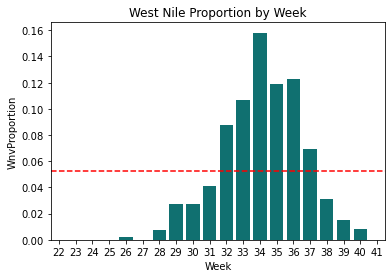

In [35]:
#Look at West Nile Proportion by week of year
df_traps['Week'] = df_traps['Date'].dt.isocalendar()['week']
df_traps_grp['Week'] = df_traps_grp['Date'].dt.isocalendar()['week']

data = getWnvProportionData(df_traps_grp,'Week')
sns.barplot(data=data,x='Week',y='WnvProportion', color='teal');
drawProportionLine(plt.gca(),wn_ppn)
plt.gca().set_title('West Nile Proportion by Week');

The West Nile Proportion was particularly high during the 34th week of the year. Did this hold true every year?

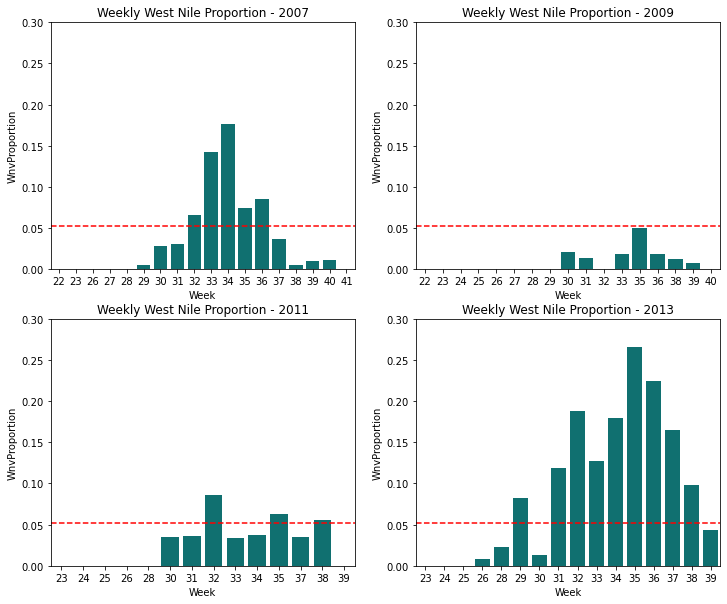

In [36]:
#Look at West Nile Proportion by week of year

fig, ax = plt.subplots(2,2, figsize=(12,10))

for i, year in enumerate(df_traps_grp['Date'].dt.year.unique()):
    data = getWnvProportionData(df_traps_grp.loc[df_traps_grp['Date'].dt.year==year],'Week')

    ax.flatten()[i].set_xlim(22, 41)
    ax.flatten()[i].set_ylim(0, 0.3)
    
    sns.barplot(data=data,x='Week',y='WnvProportion', color='teal', ax=ax.flatten()[i]);
    ax.flatten()[i].set_title('Weekly West Nile Proportion - ' + str(year))
    drawProportionLine(ax.flatten()[i], wn_ppn)

Generally, West Nile appears between weeks 30 and 40 (it did appear earlier in 2013). In severe years, West Nile proportion was greater than 0.1 during weeks 31 through 37. In all years, the week with the highest proportion was within the 31-37 range. A feature can be created to indicate the peak season.

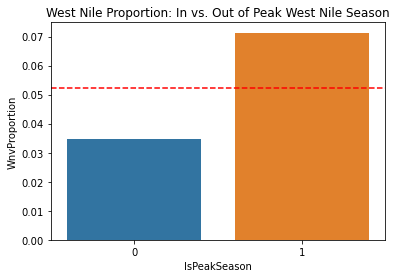

In [37]:
#Create IsPeakSeason feature
df_traps['IsPeakSeason'] = 0
df_traps.loc[(31 <= df_traps['Week']) & (df_traps['Week'] <= 37), 'IsPeakSeason'] = 1

df_traps_grp['IsPeakSeason'] = 0
df_traps_grp.loc[(31 <= df_traps['Week']) & (df_traps['Week'] <= 37), 'IsPeakSeason'] = 1

data = getWnvProportionData(df_traps_grp,'IsPeakSeason')
sns.barplot(data=data,x='IsPeakSeason',y='WnvProportion');
drawProportionLine(plt.gca(), wn_ppn)
plt.gca().set_title('West Nile Proportion: In vs. Out of Peak West Nile Season');

**Days of the year that do not correspond to peak season:**

In [38]:
df_traps['DayOfYear'] = df_traps['Date'].dt.dayofyear
df_traps_grp['DayOfYear'] = df_traps_grp['Date'].dt.dayofyear

data= getWnvProportionData(df_traps_grp,'DayOfYear')
top_10_days = data.sort_values('WnvProportion',ascending=False).head(10)

In [39]:
#Do the top 10 days all correspond to peak season?
df_traps[(df_traps['DayOfYear'].isin(top_10_days['DayOfYear'].values)) & 
        (df_traps['IsPeakSeason'] == 0)]

Empty DataFrame
Columns: [Date, Species, Trap, Latitude, Longitude, NumMosquitos, WnvPresent, IsDowntownCore, IsNorthWestZone, IsNorthEastZone, Lat_Long_Product, TrapZone, Year, IsInSeason, Month, Week, IsPeakSeason, DayOfYear]
Index: []

As expected, the top 10 days for West Nile presence all fall within peak season.

**West Nile Proportion and Mosquito Count Over Time:**

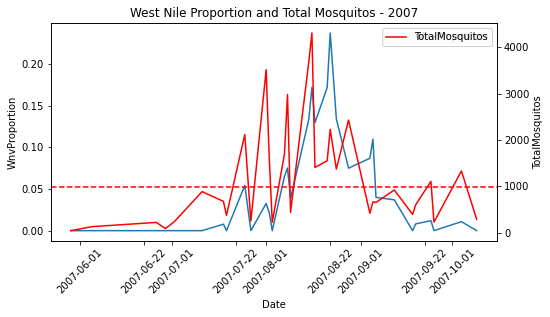

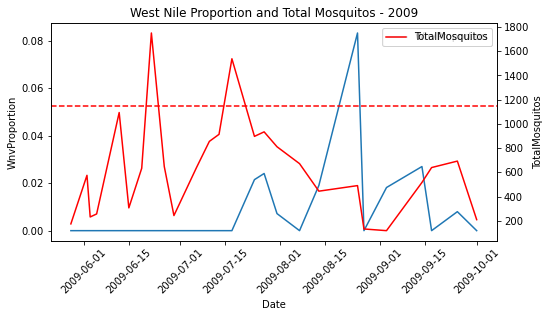

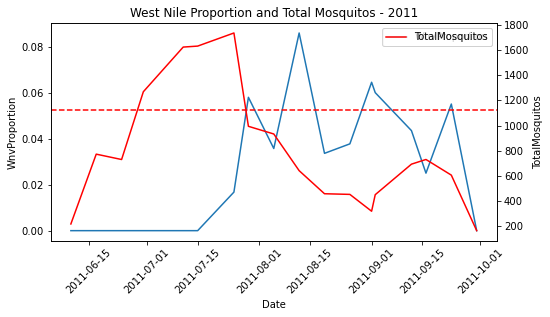

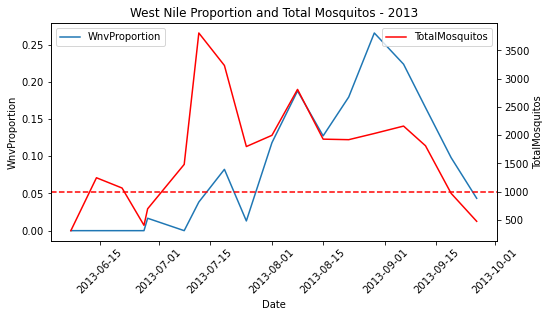

In [40]:
data = df_traps_grp.groupby('Date').agg({'NumMosquitos':'mean','NumTrapGroups':'sum','NumWnvPresent':'sum'}).reset_index()
data['WnvProportion'] = data['NumWnvPresent'] / data['NumTrapGroups']
data['TotalMosquitos'] = data['NumMosquitos'] * data['NumTrapGroups']

for year in data['Date'].dt.year.unique():
    year_data = data[data['Date'].dt.year == year]
    fig, ax = plt.subplots(figsize=(8,4))
    wn = sns.lineplot(data=year_data, x='Date', y='WnvProportion', ax=ax, label='WnvProportion')
    
    drawProportionLine(ax, wn_ppn)
    
    ax2 = ax.twinx()
    tm = sns.lineplot(data=year_data, x='Date', y='TotalMosquitos', ax=ax2, color='red', label='TotalMosquitos')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title('West Nile Proportion and Total Mosquitos - ' + str(year))
    

## 2.1.4 Individual Traps

**West Nile presence vs. number of trapped mosquitos:**

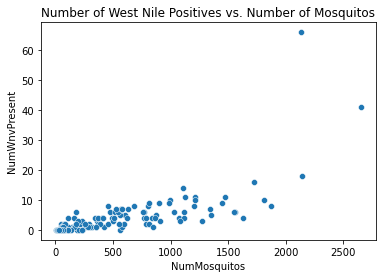

In [41]:
data = df_traps_grp.groupby('Trap').agg({'NumMosquitos':'sum','NumWnvPresent':'sum'})
sns.scatterplot(data=data, x='NumMosquitos',y='NumWnvPresent');
plt.gca().set_title('Number of West Nile Positives vs. Number of Mosquitos');

As expected, more West Nile positives will be found in traps that catch more mosquitos. However, one trap seemed to have a very high West Nile positive count compared to the number of mosquitos it caught.

In [42]:
#Which Trap had the high West Nile/Times Checked Ratio?
trap = data.sort_values(by='NumWnvPresent').tail(1).index[0]
df_traps[df_traps['Trap'] == trap].head()

Date                 Species  Trap   Latitude  Longitude  \
3868 2009-05-28          CULEX RESTUANS  T900  41.974689 -87.890615   
3869 2009-05-28          CULEX RESTUANS  T900  41.974689 -87.890615   
3963 2009-06-03  CULEX PIPIENS/RESTUANS  T900  41.974689 -87.890615   
3964 2009-06-03  CULEX PIPIENS/RESTUANS  T900  41.974689 -87.890615   
3965 2009-06-03  CULEX PIPIENS/RESTUANS  T900  41.974689 -87.890615   

      NumMosquitos  WnvPresent  IsDowntownCore  IsNorthWestZone  \
3868            30           0               0                1   
3869             4           0               0                1   
3963            22           0               0                1   
3964            50           0               0                1   
3965            21           0               0                1   

      IsNorthEastZone  Lat_Long_Product     TrapZone  Year  IsInSeason Month  \
3868                0      -3689.181231  -87.9/41.95  2009           0     5   
3869                0      -3689.181231  -87.9/41.95  2009           0     5   
3963                0      -3689.181231  -87.9/41.95  2009           0     6   
3964                0      -3689.181231  -87.9/41.95  2009           0     6   
3965                0      -3689.181231  -87.9/41.95  2009           0     6   

      Week  IsPeakSeason  DayOfYear  
3868    22             0        148  
3869    22             0        148  
3963    23             0        154  
3964    23             0        154  
3965    23             0        154

**Inspect Trap T900:**

In [43]:
#is trap T900 at an extreme latitude?
df_traps.groupby('Trap')['Latitude'].first().sort_values()

Trap
T097    41.644612
T221    41.659112
T135    41.662014
T115    41.673408
T200    41.678618
          ...    
T008    42.008314
T233    42.009876
T018    42.010412
T016    42.011601
T148    42.017430
Name: Latitude, Length: 138, dtype: float64

In [44]:
#is trap T900 at an extreme longitude?
df_traps.groupby('Trap')['Longitude'].first().sort_values()

Trap
T903    -87.930995
T900    -87.890615
T0092   -87.862995
T011    -87.832763
T015    -87.824812
           ...    
T221    -87.538693
T103    -87.536497
T212    -87.535198
T100    -87.531657
T215    -87.531635
Name: Longitude, Length: 138, dtype: float64

Trap T900 is located at the second lowest longitude. This places the trap in the NorthWest zone identified earlier. Therefore, location may be an explanation for trap T900's high West Nile proporiton.

In [45]:
#did the trap catch more mosquitos than other traps?
df_traps.groupby('Trap')['NumMosquitos'].sum().sort_values()

Trap
T040        6
T149       15
T078       17
T237       18
T072       19
        ...  
T128     3315
T002     3710
T138     9936
T900    15386
T115    21668
Name: NumMosquitos, Length: 138, dtype: int64

The trap (T900) caught more mosquitos than all but one other trap. This could mean that more mosquitos are found at lower longitudes which would explain why more West Nile cases are found at lower longitudes.

**Trap Checking Schedule:**

In [46]:
#Days Since Trap Checked
first = True
for year in df_traps['Year'].unique():
    for trap in df_traps['Trap'].unique():
        dates = df_traps.loc[(df_traps['Year'] == year) & (df_traps['Trap'] == trap)]['Date'].unique()
        date_mappings_temp = pd.DataFrame(dates).rename(columns={0:'Date'})
        date_mappings_temp['Shift'] = date_mappings_temp['Date'].shift()
        date_mappings_temp['Prev_Check'] = (date_mappings_temp['Date'] - date_mappings_temp['Shift']).dt.days
        date_mappings_temp.loc[date_mappings_temp['Prev_Check'].isna(),'Prev_Check'] = -1
        date_mappings_temp = date_mappings_temp.drop(columns='Shift')
        date_mappings_temp['Trap'] = trap
        
        if first:
            date_mappings = date_mappings_temp
            first = False
        else:
            date_mappings = pd.concat([date_mappings,date_mappings_temp])

df_traps = pd.merge(df_traps,date_mappings,on=['Date','Trap'],how='left')
df_traps_grp = pd.merge(df_traps_grp,date_mappings,on=['Date','Trap'],how='left')

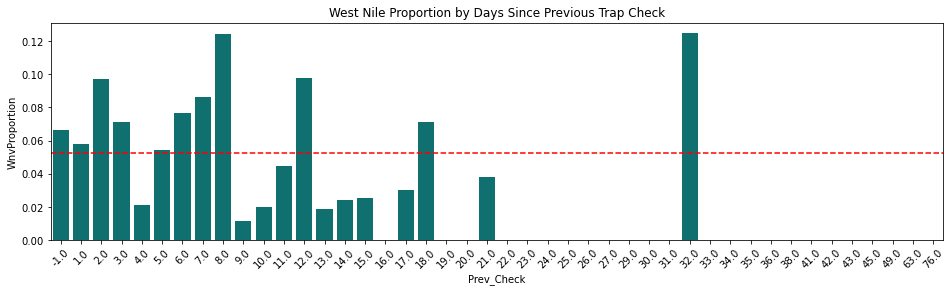

In [47]:
data = getWnvProportionData(df_traps_grp[df_traps_grp['IsInSeason'] == 1],'Prev_Check')

fig,ax = plt.subplots(figsize=(16,4))
sns.barplot(data=data,x='Prev_Check',y='WnvProportion', color='teal')
drawProportionLine(ax,wn_ppn)
ax.tick_params(axis='x', rotation=45)
ax.set_title('West Nile Proportion by Days Since Previous Trap Check');

## 2.1.5 Species:

**Species Frequency:**

In [48]:
#check number of rows for each Species
df_traps.groupby('Species')['Date'].count().sort_values()

Species
CULEX ERRATICUS              1
CULEX TARSALIS               6
CULEX SALINARIUS            86
CULEX TERRITANS            222
CULEX PIPIENS             2699
CULEX RESTUANS            2740
CULEX PIPIENS/RESTUANS    4752
Name: Date, dtype: int64

**West Nile presence and mosquito count by species:**

In [49]:
#check if West Nile virus been found in all species
df_traps.groupby('Species').agg({'NumMosquitos':'sum','WnvPresent':'max'}) \
    .sort_values(by='NumMosquitos')

NumMosquitos  WnvPresent
Species                                         
CULEX ERRATICUS                    7           0
CULEX TARSALIS                     7           0
CULEX SALINARIUS                 145           0
CULEX TERRITANS                  510           0
CULEX RESTUANS                 23431           1
CULEX PIPIENS                  44671           1
CULEX PIPIENS/RESTUANS         66268           1

West Nile virus was not found in four of the species. However, very few mosquitos of these species were trapped. Therefore, it is difficult to know whether there were no West Nile occurrences due to the species or due to the small number of samples. Therefore, these species can be combined into an "Other" group.

In [50]:
#Create the "Other" species group
other_list = \
    df_traps.groupby('Species')['WnvPresent'].max()[df_traps.groupby('Species')['WnvPresent'].max() == 0].index

other_indices = df_traps[df_traps['Species'].isin(other_list)].index

#df_traps.drop(index=drop_indices, inplace=True)
df_traps.loc[other_indices,'Species'] = 'OTHER'

#same for the grouped data
other_list = \
    df_traps_grp.groupby('Species')['WnvPresent'].max()[df_traps_grp.groupby('Species')['WnvPresent'].max() == 0].index

other_indices = df_traps_grp[df_traps_grp['Species'].isin(other_list)].index

#df_traps.drop(index=drop_indices, inplace=True)
df_traps_grp.loc[other_indices,'Species'] = 'OTHER'

**West Nile proporiton by species:**

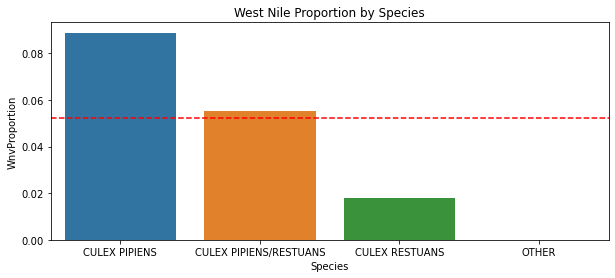

In [51]:
#check West Nile proportion by species
data = getWnvProportionData(df_traps_grp,'Species')

fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=data, x='Species', y='WnvProportion');
drawProportionLine(plt.gca(),wn_ppn)
ax.set_title('West Nile Proportion by Species');

It appears that CULEX PIPIENS is more likely to be West Nile positive than CULEX RESTUANS. West Nile was not found in any other species.

## 2.2 Spray Data 

**Summary Stats:**

In [52]:
#summary stats
df_spray.describe().T

count       mean       std        min        25%        50%  \
Latitude   14835.0  41.904828  0.104381  41.713925  41.785001  41.940075   
Longitude  14835.0 -87.736690  0.067292 -88.096468 -87.794225 -87.727853   

                 75%        max  
Latitude   41.980978  42.395983  
Longitude -87.694108 -87.586727

**Spray Data Distributions:**

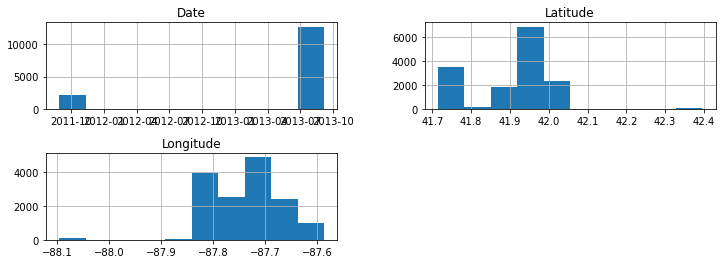

In [53]:
#plot histograms
df_spray.hist(figsize=(12,4))
plt.subplots_adjust(hspace=0.5);

Note that there is an outlier for both Latitude and Longitude. Was the outlier spray within range of the traps?

**Outlier Spray:**

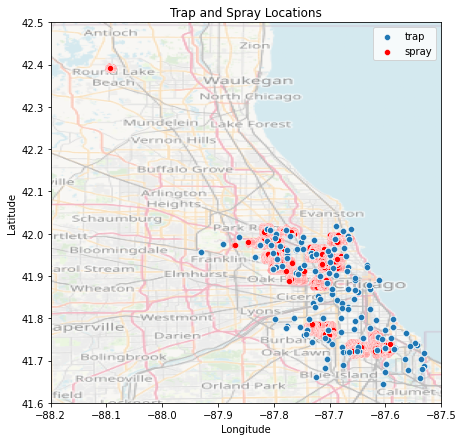

In [54]:
#Check the outlier spray
fig, ax = plt.subplots(figsize=(7,7));
ax.set_title('Trap and Spray Locations')
ax.set_xlim(BBox_Outlier[0], BBox_Outlier[1])
ax.set_ylim(BBox_Outlier[2], BBox_Outlier[3])
ax.imshow(map_outlier_img, alpha=0.5, extent=BBox_Outlier, zorder=0, aspect='auto');

sns.scatterplot(data=df_traps, x='Longitude', y='Latitude', label='trap', zorder=2);
sns.scatterplot(data=df_spray, x='Longitude', y='Latitude', label='spray', zorder=1, color='red');

The outlier spray is not anywhere near the traps. Outlier data can be dropped.

In [55]:
#Drop the spray outliers
drop_indices = df_spray[df_spray['Latitude'] > 42.3].index
df_spray = df_spray.drop(drop_indices)

**Spray map with outliers removed:**

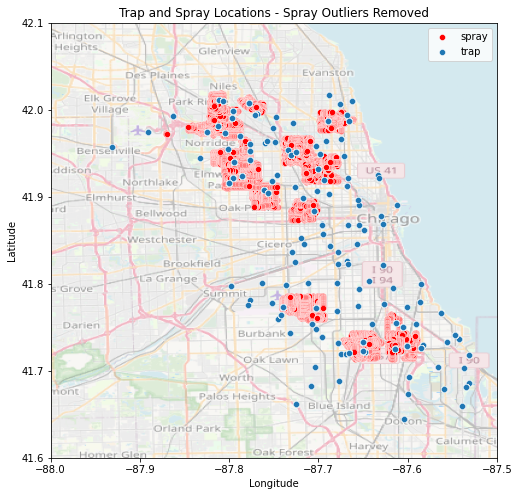

In [56]:
#Re-examing the spray map after removing outliers
fig, ax = plt.subplots(figsize=(8,8));
ax.set_title('Trap and Spray Locations - Spray Outliers Removed')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(data=df_spray, x='Longitude', y='Latitude', label='spray', color='red');
sns.scatterplot(data=df_traps, x='Longitude', y='Latitude', label='trap');

**Mosquito count and spray regions:**

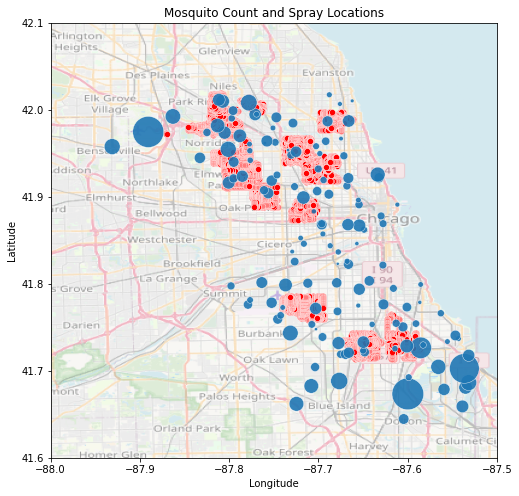

In [57]:
#How does mosquito count vary by region?
data = df_traps_grp.groupby(['Latitude','Longitude']) \
    .agg({'NumMosquitos':'mean','NumTrapGroups':'mean'}).reset_index()
data['TotalMosquitos'] = data['NumMosquitos'] * data['NumTrapGroups']

fig, ax = plt.subplots(figsize=(8,8));
ax.set_title('Mosquito Count and Spray Locations')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(data=data, x='Longitude',y='Latitude',size='TotalMosquitos', sizes=(1,1000), zorder=2, alpha=0.9);
sns.scatterplot(data=df_spray, x='Longitude', y='Latitude', label='spray', color='red', zorder=1);
ax.get_legend().remove()

It appears that spraying not only reduced mosquito counts within the spray zones, but it may have also reduced mosquito counts in between spray zones. Mosquito counts increased drastically outside of these boundaries. Spraying does appear to have an impact on mosquito count. Therefore, it likely impacts West Nile presence. 

## 2.3 Weather Data

**Summary Stats:**

In [58]:
#summary stats
df_weather.describe().T

count         mean        std      min       25%  \
Tmax_1              1472.0    75.978940  11.503150    42.00    68.000   
Tmin_1              1472.0    56.730978  10.347907    29.00    49.000   
Tavg_1              1472.0    66.606658  10.511437    36.00    60.000   
Tdepart             1472.0     1.954484   6.841110   -17.00    -3.000   
Tdew_point_1        1472.0    53.377717  10.670263    22.00    46.000   
Twet_bulb_1         1472.0    59.047554   9.317960    32.00    53.000   
HeatDegDay_1        1472.0     3.631114   6.133829     0.00     0.000   
CoolDegDay_1        1472.0     5.237772   5.899382     0.00     0.000   
Sunrise             1472.0   480.646739  65.344729   416.00   424.750   
Sunset              1472.0  1848.000000  86.541778  1647.00  1802.250   
PrecipTotal_1       1472.0     0.135092   0.420892     0.00     0.000   
StnPressure_1       1472.0    29.254198   0.156041    28.55    29.160   
Wind_ResultSpeed_1  1472.0     6.987092   3.586353     0.10     4.400   
Wind_ResultDir_1    1472.0    17.656250  10.222077     1.00     7.000   
Wind_AvgSpeed_1     1472.0     8.570788   3.187250     1.90     6.200   
WeatherCode_BR_1    1472.0     0.279212   0.448764     0.00     0.000   
WeatherCode_DZ_1    1472.0     0.039402   0.194616     0.00     0.000   
WeatherCode_HZ_1    1472.0     0.071332   0.257465     0.00     0.000   
WeatherCode_NONE_1  1472.0     0.546875   0.497967     0.00     0.000   
WeatherCode_RA_1    1472.0     0.322690   0.467664     0.00     0.000   
WeatherCode_TS_1    1472.0     0.036005   0.186367     0.00     0.000   
WeatherCode_TSRA_1  1472.0     0.101902   0.302622     0.00     0.000   
Tmax_2              1472.0    76.353261  11.421482    41.00    69.000   
Tmin_2              1472.0    58.889946  10.306855    29.00    51.000   
Tavg_2              1472.0    67.874321  10.531806    36.00    61.000   
Tdew_point_2        1472.0    53.538043  10.683121    23.00    46.000   
Twet_bulb_2         1472.0    59.591033   9.244169    33.00    53.000   
HeatDegDay_2        1472.0     3.173234   5.746682     0.00     0.000   
CoolDegDay_2        1472.0     6.047554   6.283938     0.00     0.000   
PrecipTotal_2       1472.0     0.128468   0.363153     0.00     0.000   
StnPressure_2       1472.0    29.314647   0.155069    28.63    29.230   
Wind_ResultSpeed_2  1472.0     6.934239   3.589725     0.30     4.275   
Wind_ResultDir_2    1472.0    17.333560   9.903450     1.00     8.000   
Wind_AvgSpeed_2     1472.0     8.587364   3.105672     1.70     6.300   
WeatherCode_BR_2    1472.0     0.273098   0.445702     0.00     0.000   
WeatherCode_DZ_2    1472.0     0.050951   0.219973     0.00     0.000   
WeatherCode_HZ_2    1472.0     0.107337   0.309646     0.00     0.000   
WeatherCode_NONE_2  1472.0     0.546196   0.498031     0.00     0.000   
WeatherCode_RA_2    1472.0     0.312500   0.463670     0.00     0.000   
WeatherCode_TS_2    1472.0     0.033288   0.179449     0.00     0.000   
WeatherCode_TSRA_2  1472.0     0.105299   0.307043     0.00     0.000   

                        50%       75%      max  
Tmax_1                78.00    85.000   103.00  
Tmin_1                58.00    65.000    82.00  
Tavg_1                68.00    75.000    93.00  
Tdepart                2.00     7.000    23.00  
Tdew_point_1          54.00    61.250    75.00  
Twet_bulb_1           60.00    66.000    78.00  
HeatDegDay_1           0.00     5.000    29.00  
CoolDegDay_1           3.00    10.000    28.00  
Sunrise              446.50   531.250   623.00  
Sunset              1879.50  1922.250  1931.00  
PrecipTotal_1          0.00     0.060     6.86  
StnPressure_1         29.26    29.350    29.79  
Wind_ResultSpeed_1     6.40     9.100    24.10  
Wind_ResultDir_1      19.50    26.000    36.00  
Wind_AvgSpeed_1        8.10    10.400    26.30  
WeatherCode_BR_1       0.00     1.000     1.00  
WeatherCode_DZ_1       0.00     0.000     1.00  
WeatherCode_HZ_1       0.00     0.000     1.00  
WeatherCode_NONE_1     

**Weather Data Distributions:**

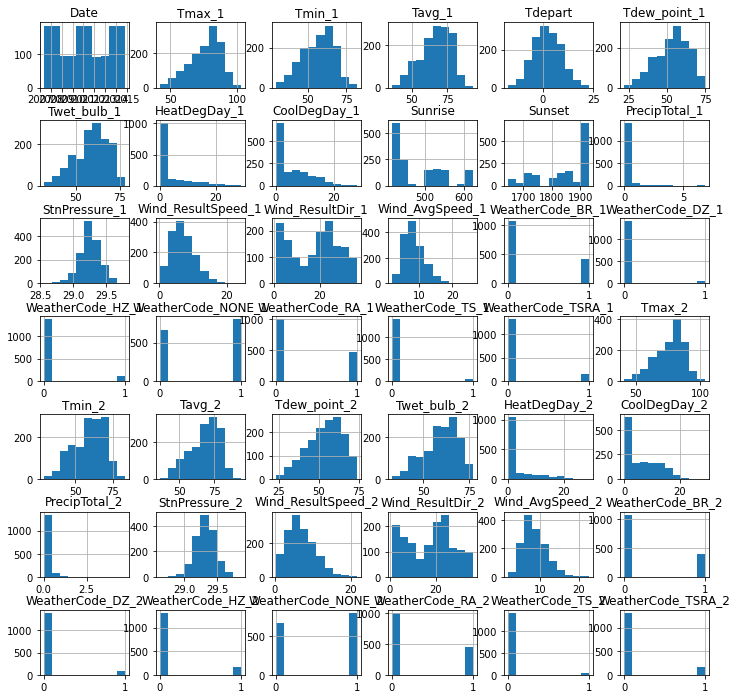

In [59]:
#plot histograms
df_weather.hist(figsize=(12,12))
plt.subplots_adjust(hspace=0.5);

**Correlations among the temperature columns (weather station 1):**

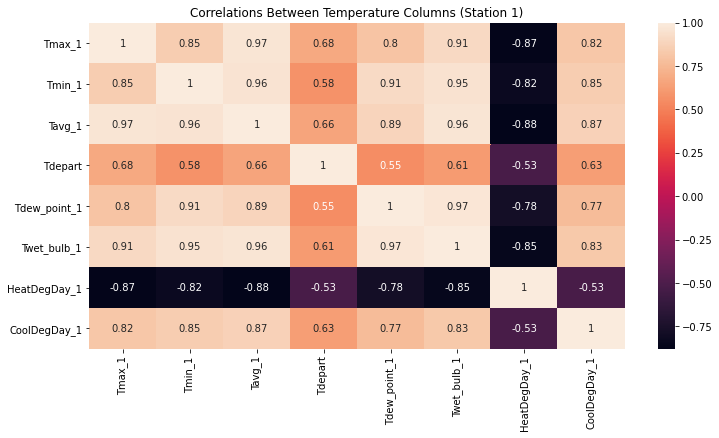

In [60]:
#look at correlations within the temperature columns - weather station 1
columns = ['Tmax_1','Tmin_1','Tavg_1','Tdepart','Tdew_point_1','Twet_bulb_1','HeatDegDay_1','CoolDegDay_1']

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_weather[columns].corr(), annot=True);
ax.set_title('Correlations Between Temperature Columns (Station 1)');

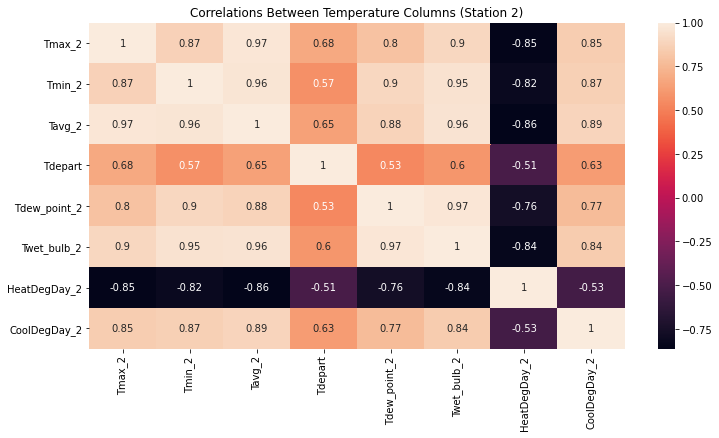

In [61]:
#look at correlations within the temperature columns - weather station 2
columns = ['Tmax_2','Tmin_2','Tavg_2','Tdepart','Tdew_point_2','Twet_bulb_2','HeatDegDay_2','CoolDegDay_2']

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_weather[columns].corr(), annot=True);
ax.set_title('Correlations Between Temperature Columns (Station 2)');

As expected, the temperature columns are highly correlated.

**Correlations among all columns (station 1):**

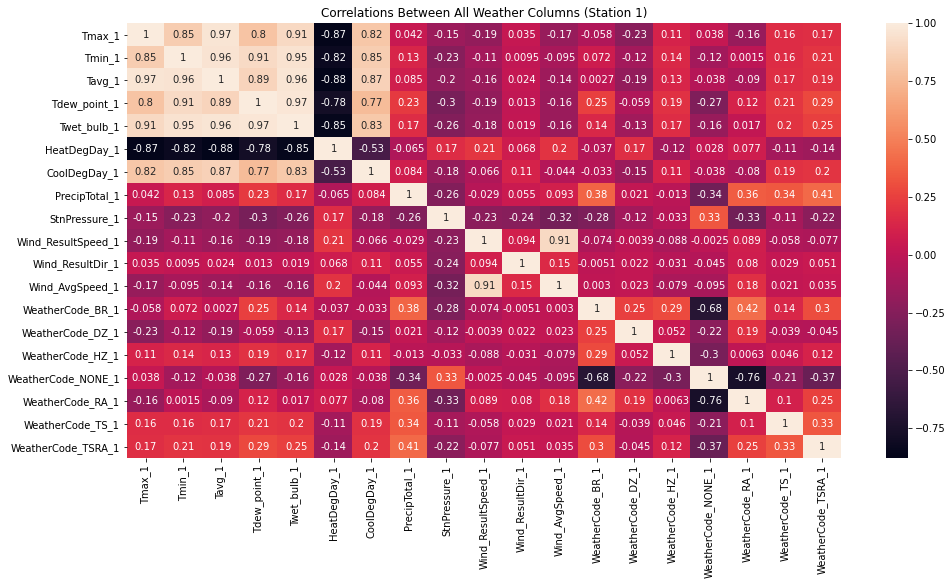

In [62]:
#correlations between all columns - station 1

columns = [column for column in df_weather.columns if column.endswith('_1')]

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_weather[columns].corr(), annot=True);
ax.set_title('Correlations Between All Weather Columns (Station 1)');

**Correlations among all columns (station 2):**

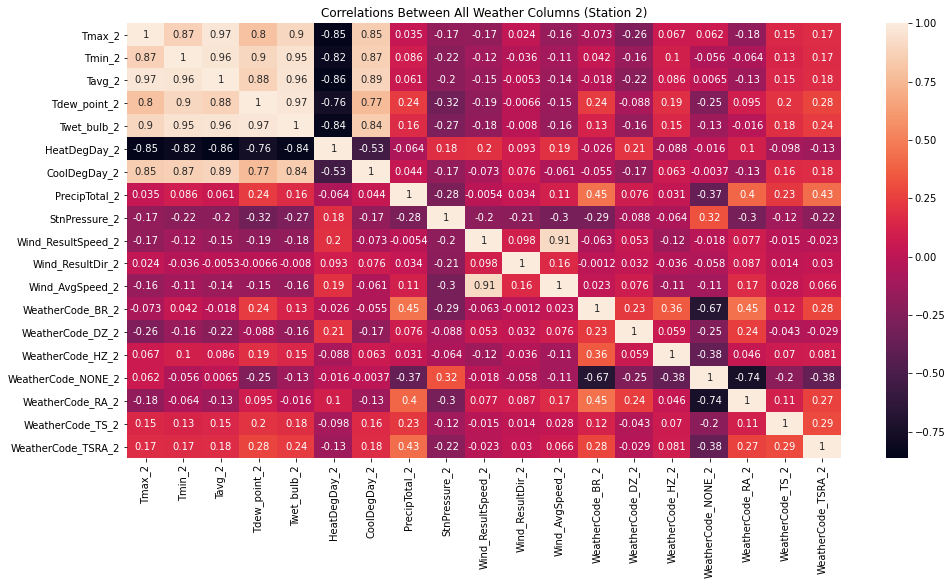

In [63]:
#correlations between all columns - station 2

columns = [column for column in df_weather.columns if column.endswith('_2')]

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_weather[columns].corr(), annot=True);
ax.set_title('Correlations Between All Weather Columns (Station 2)');

Resultant wind speed and average wind speed are highly correlated. The resultant wind speed column can be dropped.

In [64]:
columns = ([column for column in df_weather.columns if column.startswith('Wind_ResultSpeed')])
df_weather.drop(columns=columns, inplace=True)

## 2.3.1 Engineer Basic Weather Features:

**Days Since Precipitation:**

In [65]:
#Create a column to track days since  precipitation

#Weather Station #1

#Set dates with no precipitation to null
df_weather['DaysSincePrecip_1'] = df_weather['Date'] 
df_weather.loc[(df_weather['PrecipTotal_1'] == 0), 'DaysSincePrecip_1'] = pd.NaT

#Forward fill the missing dates and calculate the days between the filled date and current date
for year in df_weather['Date'].dt.year.unique():
    df_weather.loc[(df_weather['Date'].dt.year == year),'DaysSincePrecip_1'] = \
        df_weather.loc[(df_weather['Date'].dt.year == year),'DaysSincePrecip_1'].ffill()
df_weather['DaysSincePrecip_1'] = (df_weather['Date'] - df_weather['DaysSincePrecip_1']).dt.days

#Since a forward fill was used, the first rows for each year may be null - impute with the mean
mean_value = round(df_weather['DaysSincePrecip_1'].median())
df_weather['DaysSincePrecip_1'].fillna(value=mean_value, inplace=True)


#Weather Station #2

#Set dates with no precipitation to null
df_weather['DaysSincePrecip_2'] = df_weather['Date'] 
df_weather.loc[(df_weather['PrecipTotal_2'] == 0), 'DaysSincePrecip_2'] = pd.NaT

#Forward fill the missing dates and calculate the days between the filled date and current date (for same year)
for year in df_weather['Date'].dt.year.unique():
    df_weather.loc[(df_weather['Date'].dt.year == year),'DaysSincePrecip_2'] = \
        df_weather.loc[(df_weather['Date'].dt.year == year),'DaysSincePrecip_2'].ffill()
    
df_weather['DaysSincePrecip_2'] = (df_weather['Date'] - df_weather['DaysSincePrecip_2']).dt.days

#Since a forward fill was used the first rows may be missing date - impute with the mean
mean_value = round(df_weather['DaysSincePrecip_2'].median())
df_weather['DaysSincePrecip_2'].fillna(value=mean_value, inplace=True)


**Weekly Precipitation:**

In [66]:
#create weekly precipitation column
df_weather['Week'] = df_weather['Date'].dt.isocalendar()['week']
df_weather['Year'] = df_weather['Date'].dt.year

precip_week= df_weather.groupby(['Week','Year']).agg({'PrecipTotal_1':'sum','PrecipTotal_2':'sum'}) \
    .reset_index() \
    .rename(columns={'PrecipTotal_1':'PrecipWeekly_1', 'PrecipTotal_2':'PrecipWeekly_2'})


df_weather = pd.merge(df_weather,precip_week, on=['Week','Year'],how='left')

In [67]:
df_weather.drop(columns=['Year','Week'], inplace=True)

**Day Length (Minutes):**

In [68]:
#create DaylightMinutes feature
daylight_time = (pd.to_datetime(df_weather['Sunset'], format='%H%M') - \
                  pd.to_datetime(df_weather['Sunrise'], format='%H%M')) 
daylight_time = daylight_time / np.timedelta64(1, 'm')
df_weather['DaylightMinutes'] = daylight_time

**Relative Humidity:**

Relative humidity may be a factor that impacts mosquito populations. Its' formula can be calculated using dewpoint and tempearature. 

* Relative humidity formula (uses Celsius values): 
100 x (exp((17.625 x Dewpoint)/(243.04 + Dewpoint)) / exp((17.625 * Temperature)/(243.04 + Temperature)))
* Fahrenheit to Celsuis formula:
Tc = (Tf - 32) x 5/9

Sources: 
* https://parasitesandvectors.biomedcentral.com/articles/10.1186/1756-3305-6-129
* https://bmcnoldy.rsmas.miami.edu/Humidity.html
* https://www.rapidtables.com/convert/temperature/how-fahrenheit-to-celsius.html

In [69]:
#convert to celsius
def fahrenheit_to_celsuis(temp_fahrenheit):
    return (temp_fahrenheit - 32) * (5/9)

In [70]:
#calulcate relative humidity
c1 = 100
c2 = 17.625
c3 = 243.04
def get_relative_humidity(temp_avg, dewpoint, fahrenheit=True):  
    if fahrenheit:
        temp_avg = fahrenheit_to_celsuis(temp_avg)
        dewpoint = fahrenheit_to_celsuis(dewpoint)
    return round(c1 * (np.exp((c2 * dewpoint)/(c3 + dewpoint)) / np.exp((c2 * temp_avg) / (c3 + temp_avg))))

In [71]:
#create relative humidity columns
df_weather['RelHumidity_1'] = \
    get_relative_humidity(df_weather['Tavg_1'],df_weather['Tdew_point_1']).astype(np.int64)
df_weather['RelHumidity_2'] = \
    get_relative_humidity(df_weather['Tavg_2'],df_weather['Tdew_point_2']).astype(np.int64)

## 2.3.2 Engineer Rolling Weather Features:

In [72]:
#get rolling values for a specified column
def getRollingValues(data, period, column, function):

    new_col = column + '_' + str(period) + 'days'
    data[new_col] = 0
    
    for year in data['Date'].dt.year.unique():
            
        #calculate the rolling values for each year
        data.loc[data['Date'].dt.year == year, new_col] = \
            data.loc[data['Date'].dt.year == year, column].rolling(period).apply(function)
        
        #The first 'period' values will be missing. Impute by applying the function argument to those days.
        data.loc[((data['Date'].dt.year == year) & (data[new_col].isna())), new_col] = \
            function(data.loc[((data['Date'].dt.year == year) & (data[new_col].isna())), column])

**Rolling Mean Temperature Last 7, 14, 21, 28 days:**

In [73]:
for period in [7,14,21,28]:
    getRollingValues(df_weather, period, 'Tavg_1', np.mean)
    getRollingValues(df_weather, period, 'Tavg_2', np.mean)

**Roling Mean Wind Speed Last 7, 14, 21, 28 days:**

In [74]:
for period in [7,14,21,28]:
    getRollingValues(df_weather, period, 'Wind_AvgSpeed_1', np.mean)
    getRollingValues(df_weather, period, 'Wind_AvgSpeed_2', np.mean)

**Rolling Mean Precipitation Last 7,14,21,28 days:**

In [75]:
for period in [7,14,21,28]:
    getRollingValues(df_weather, period, 'PrecipTotal_1', np.mean)
    getRollingValues(df_weather, period, 'PrecipTotal_2', np.mean)

**Rolling Mean Relative Humidity Last 7,14,21,28 days:**

In [76]:
for period in [7,14,21,28]:
    getRollingValues(df_weather, period, 'RelHumidity_1', np.mean)
    getRollingValues(df_weather, period, 'RelHumidity_2', np.mean)

## 2.3.3 Engineer Lagged Weather Features:

Mosquitos typically have a 2-4 week life cycle. However, in hot summer conditions, the mosquito life cycle can be completed in less than a week.
https://www.in.gov/health/erc/zoonotic-and-vectorborne-epidemiology-entomology/pests/culex-species-mosquitoes/

Therefore, lagged features will be created for each day going back 28 days. Also, mean lagged weather features will be derived for 1, 2, 3, and 4 weeks back.

In [77]:
def getLaggedValues(data, lag, period, column, function=None, str_suffix=''):
    
    if len(str_suffix) == 0:
        new_col = column + '_lag' + str(lag) 
    else:
        new_col = column + '_lag' + str(lag) + '_' + str_suffix
    data[new_col] = 0
    
    for year in data['Date'].dt.year.unique():
        
        if function is None:
            
            #get lag values
            data.loc[data['Date'].dt.year == year, new_col] = \
                data.loc[data['Date'].dt.year == year, column].shift(lag)
            
            #Top values will be missing due to the lag. 
            #Impute with the mean value from those days.
            data.loc[((data['Date'].dt.year == year) & (data[new_col].isna())), new_col] = \
                np.mean(data.loc[((data['Date'].dt.year == year) & (data[new_col].isna())), column])
            
        else:
            
            #calculate the rolling values for each year
            data.loc[data['Date'].dt.year == year, new_col] = \
                data.loc[data['Date'].dt.year == year, column].rolling(period).apply(function).shift(lag)
        
            #Values at the top will be missing due to the rolling calculation and the lag. 
            #Impute by applying the function argument to those days.
            data.loc[((data['Date'].dt.year == year) & (data[new_col].isna())), new_col] = \
                function(data.loc[((data['Date'].dt.year == year) & (data[new_col].isna())), column])
    

**Lagged Temperature (1-28 days):**

In [78]:
for lag in range(1,29):
    getLaggedValues(df_weather,lag,0,'Tavg_1')
    getLaggedValues(df_weather,lag,0,'Tavg_2')

**Lagged Wind Speed (1-28 days):**

In [79]:
for lag in range(1,29):
    getLaggedValues(df_weather,lag,0,'Wind_AvgSpeed_1')
    getLaggedValues(df_weather,lag,0,'Wind_AvgSpeed_2')

**Lagged Precipitation (1-28 days):**

In [80]:
for lag in range(1,29):
    getLaggedValues(df_weather,lag,0,'PrecipTotal_1')
    getLaggedValues(df_weather,lag,0,'PrecipTotal_2')

**Lagged Daylight Minutes (1-28 days):**

In [81]:
for lag in range(1,29):
    getLaggedValues(df_weather,lag,0,'DaylightMinutes')

**Lagged Relative Humidity (1-28 days):**

In [82]:
for lag in range(1,29):
    getLaggedValues(df_weather,lag,0,'RelHumidity_1')
    getLaggedValues(df_weather,lag,0,'RelHumidity_2')

**7-Day Mean Lagged Temperature 7, 14, 21, and 28 days back:**

In [83]:
period=7
for lag in [7,14,21,28]:
    getLaggedValues(df_weather,lag,period,'Tavg_1',np.mean,'mean')
    getLaggedValues(df_weather,lag,period,'Tavg_2',np.mean,'mean')

**7-Day Mean Lagged Wind Speed 7,14,21, and 28 days back:**

In [84]:
period=7
for lag in [7,14,21,28]:
    getLaggedValues(df_weather,lag,period,'Wind_AvgSpeed_1',np.mean,'mean')
    getLaggedValues(df_weather,lag,period,'Wind_AvgSpeed_2',np.mean,'mean')

**7-Day Mean Precipitation 7, 14, 21, and 28 days back:**

In [85]:
period=7
for lag in [7,14,21,28]:
    getLaggedValues(df_weather,lag,period,'PrecipTotal_1',np.mean,'mean')
    getLaggedValues(df_weather,lag,period,'PrecipTotal_2',np.mean,'mean')

**7-Day Mean Daylight 7, 14, 21, and 28 days back:**

In [86]:
period=7
for lag in [7,14,21,28]:
    getLaggedValues(df_weather,lag,period,'DaylightMinutes',np.mean,'mean')

**7-Day Mean Relative Humidity 7,14,21,28 days back:**

In [87]:
period=7
for lag in [7,14,21,28]:
    getLaggedValues(df_weather,lag,period,'RelHumidity_1',np.mean,'mean')
    getLaggedValues(df_weather,lag,period,'RelHumidity_2',np.mean,'mean')

## 2.3.4 Nearest Weather Station for Each Trap

In [88]:
#find the nearest weather station for each trap

#weather station coordinates
df_traps['Stn1_Longitude'] = stn1_coordinates[0]
df_traps['Stn2_Longitude'] = stn2_coordinates[0]
df_traps['Stn1_Latitude'] = stn1_coordinates[1]
df_traps['Stn2_Latitude'] = stn2_coordinates[1]

#distance to weather stations (Euclidean distance)
df_traps['Stn1_Distance'] = np.sqrt(((df_traps['Latitude'] - df_traps['Stn1_Latitude']) **2) + 
                                ((df_traps['Longitude'] - df_traps['Stn1_Longitude']) **2))
df_traps['Stn2_Distance'] = np.sqrt(((df_traps['Latitude'] - df_traps['Stn2_Latitude']) **2) + 
                                ((df_traps['Longitude'] - df_traps['Stn2_Longitude']) **2))

#select the nearest station for each trap
df_traps['Weather_Station'] = np.where(df_traps['Stn1_Distance'] <= df_traps['Stn2_Distance'], 1,2)

#drop the unneeded columns
df_traps.drop(columns=['Stn1_Longitude','Stn2_Longitude','Stn1_Latitude','Stn2_Latitude','Stn1_Distance','Stn2_Distance'],
             inplace=True)


#same for the grouped data
df_traps_grp['Stn1_Longitude'] = stn1_coordinates[0]
df_traps_grp['Stn2_Longitude'] = stn2_coordinates[0]
df_traps_grp['Stn1_Latitude'] = stn1_coordinates[1]
df_traps_grp['Stn2_Latitude'] = stn2_coordinates[1]

#distance to weather stations (Euclidean distance)
df_traps_grp['Stn1_Distance'] = np.sqrt(((df_traps_grp['Latitude'] - df_traps_grp['Stn1_Latitude']) **2) + 
                                ((df_traps_grp['Longitude'] - df_traps_grp['Stn1_Longitude']) **2))
df_traps_grp['Stn2_Distance'] = np.sqrt(((df_traps_grp['Latitude'] - df_traps_grp['Stn2_Latitude']) **2) + 
                                ((df_traps_grp['Longitude'] - df_traps_grp['Stn2_Longitude']) **2))

#select the nearest station for each trap
df_traps_grp['Weather_Station'] = np.where(df_traps_grp['Stn1_Distance'] <= df_traps_grp['Stn2_Distance'], 1,2)

#drop the unneeded columns
df_traps_grp.drop(columns=['Stn1_Longitude','Stn2_Longitude','Stn1_Latitude','Stn2_Latitude','Stn1_Distance','Stn2_Distance'],
             inplace=True)

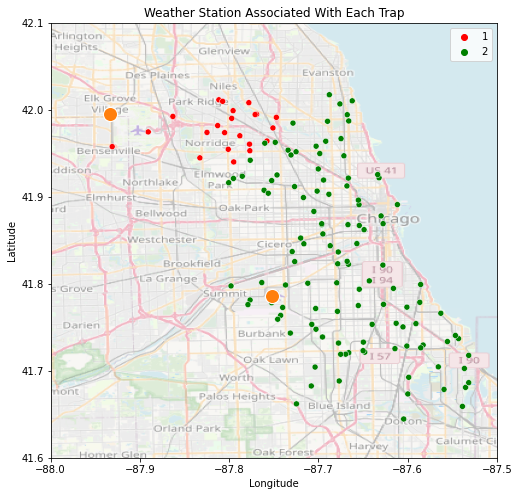

In [89]:
#plot traps by weather station on Chicago map
data = df_traps.groupby('Trap').agg({'Latitude':'first','Longitude':'first','Weather_Station':'mean'}).reset_index()


fig, ax = plt.subplots(figsize=(8,8));
ax.set_title('Weather Station Associated With Each Trap')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(data=data,x='Longitude',y='Latitude', hue='Weather_Station', palette=['Red','Green']);
sns.scatterplot(x=[stn1_coordinates[0],stn2_coordinates[0]],y=[stn1_coordinates[1], stn2_coordinates[1]], s=200);

## 2.4 Combine the Trap, Weather, and Spray Data

**Combine the trap and weather data:**

In [90]:
df = pd.merge(df_traps,df_weather,on='Date', how='left')

df_grp = pd.merge(df_traps_grp,df_weather,on='Date',how='left')

**Combine the trap/weather and spray data:**

In [91]:
#The Aug. 16th 2013 spray was done just after midnight and appears to be part of the Aug. 15th spray

time = '11:59:59 PM'
df_spray.loc[df_spray['Date'] == '2013-08-16', 'Time'] = time
df_spray.loc[df_spray['Date'] == '2013-08-16', 'Date'] = dt.datetime(2013,8,15)

df_spray['Date'].unique()

array(['2011-09-07T00:00:00.000000000', '2013-07-17T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-08T00:00:00.000000000',
       '2013-08-15T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

## 2.5 Combined Trap and Weather Data Analysis

## 2.5.1 West Nile Presence by Weather and Weather Station

**Temperature**

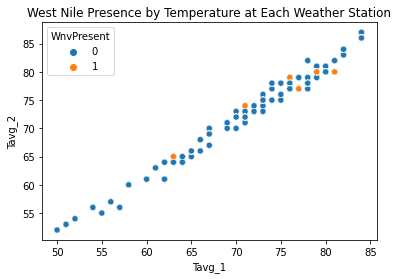

In [92]:
#how does West Nile presence vary by temperature
sns.scatterplot(data=df_grp, x='Tavg_1', y='Tavg_2', hue='WnvPresent');
plt.gca().set_title('West Nile Presence by Temperature at Each Weather Station');

West Nile Virus seem to be found above roughly 62 Farenheight. Higher temperatures appear to favour West Nile.

**Station Pressure:**

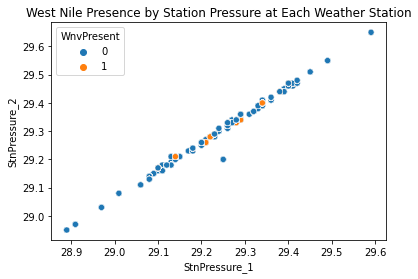

In [93]:
#how does West Nile presence vary by station pressure
sns.scatterplot(data=df_grp, x='StnPressure_1', y='StnPressure_2', hue='WnvPresent');
plt.gca().set_title('West Nile Presence by Station Pressure at Each Weather Station');

West Nile seems to be found in the midrange of station pressure values. This is likely due the midrange values occurring at a greater frequency.

**Daily Precipitation:**

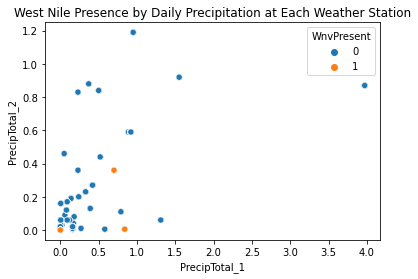

In [94]:
#how does West Nile presence vary by daily precipitation
sns.scatterplot(data=df_grp, x='PrecipTotal_1', y='PrecipTotal_2', hue='WnvPresent');
plt.gca().set_title('West Nile Presence by Daily Precipitation at Each Weather Station');

Lower precipitation levels appear to favour West Nile

**Weekly Precipitation:**

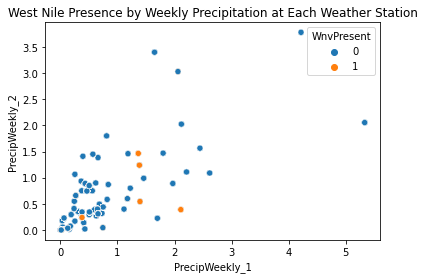

In [95]:
#how does West Nile presence vary by weekly precipitation
sns.scatterplot(data=df_grp, x='PrecipWeekly_1', y='PrecipWeekly_2', hue='WnvPresent');
plt.gca().set_title('West Nile Presence by Weekly Precipitation at Each Weather Station');

**Wind Speed:**

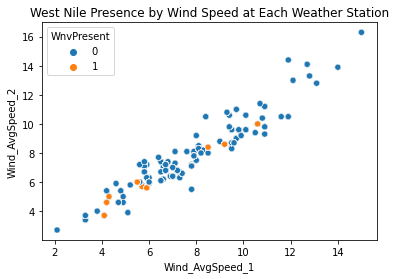

In [96]:
#how does West Nile presence vary by WindSpeed
sns.scatterplot(data=df_grp, x='Wind_AvgSpeed_1', y='Wind_AvgSpeed_2', hue='WnvPresent');
plt.gca().set_title('West Nile Presence by Wind Speed at Each Weather Station');

Wnv tends to be present at lower wind speeds

**Wind Direction:**

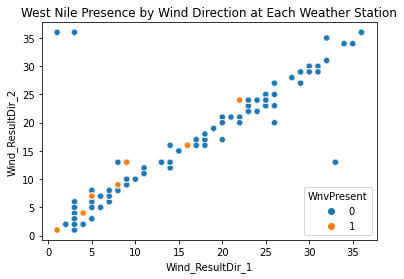

In [97]:
#how does West Nile presence vary by Wind Direction
sns.scatterplot(data=df_grp, x='Wind_ResultDir_1', y='Wind_ResultDir_2', hue='WnvPresent');
plt.gca().set_title('West Nile Presence by Wind Direction at Each Weather Station');

Wind Direction does not appear to have an effect on West Nile presence

In [98]:
#drop the Wind_ResultDir columns
drop_list = ['Wind_ResultDir_1', 'Wind_ResultDir_2']
df.drop(columns=drop_list, inplace=True)  

## 2.5.2 Map each trap to the nearest weather station


In [99]:
#map each trap to weather data from the nearest station
def mapWeatherData(df, stn1_column, stn2_column, new_column):
    
    #If weather station is 2, replace the station 1 value with the station 2 value
    df.loc[df['Weather_Station'] == 2, stn1_column] = df[stn2_column]
    
    #Drop the station 2 columns
    df.drop(columns=stn2_column, inplace=True)
    
    #Rename the combined column
    df.rename(columns={stn1_column:new_column}, inplace=True)

In [100]:
#map each trap to weather data from the nearest station

weather_mappings = {
    'Tavg':['Tavg_1','Tavg_2'],
    'Tmax':['Tmax_1','Tmax_2'],
    'Tmin':['Tmin_1','Tmin_2'],
    'Tdew_point':['Tdew_point_1','Tdew_point_2'],
    'Twet_bulb':['Twet_bulb_1','Twet_bulb_2'],
    'HeatDegDay':['HeatDegDay_1','HeatDegDay_2'],
    'CoolDegDay':['CoolDegDay_1','CoolDegDay_2'],
    'PrecipTotal':['PrecipTotal_1','PrecipTotal_2'],
    'Wind_AvgSpeed':['Wind_AvgSpeed_1','Wind_AvgSpeed_2'],
    'DaysSincePrecip':['DaysSincePrecip_1','DaysSincePrecip_2'],
    'PrecipWeekly':['PrecipWeekly_1','PrecipWeekly_2'],
    'StnPressure':['StnPressure_1','StnPressure_2'],
    'RelHumidity':['RelHumidity_1','RelHumidity_2'],
    'Tavg_7days':['Tavg_1_7days','Tavg_2_7days'],
    'Tavg_14days':['Tavg_1_14days','Tavg_2_14days'],
    'Tavg_21days':['Tavg_1_21days','Tavg_2_21days'],
    'Tavg_28days':['Tavg_1_28days','Tavg_2_28days'],
    'Wind_AvgSpeed_7days':['Wind_AvgSpeed_1_7days','Wind_AvgSpeed_2_7days'],
    'Wind_AvgSpeed_14days':['Wind_AvgSpeed_1_14days','Wind_AvgSpeed_2_14days'],
    'Wind_AvgSpeed_21days':['Wind_AvgSpeed_1_21days','Wind_AvgSpeed_2_21days'],
    'Wind_AvgSpeed_28days':['Wind_AvgSpeed_1_28days','Wind_AvgSpeed_2_28days'],    
    'PrecipTotal_7days':['PrecipTotal_1_7days','PrecipTotal_2_7days'],
    'PrecipTotal_14days':['PrecipTotal_1_14days','PrecipTotal_2_14days'],
    'PrecipTotal_21days':['PrecipTotal_1_21days','PrecipTotal_2_21days'],
    'PrecipTotal_28days':['PrecipTotal_1_28days','PrecipTotal_2_28days'], 
    'RelHumidity_7days':['RelHumidity_1_7days','RelHumidity_2_7days'], 
    'RelHumidity_14days':['RelHumidity_1_14days','RelHumidity_2_14days'], 
    'RelHumidity_21days':['RelHumidity_1_21days','RelHumidity_2_21days'], 
    'RelHumidity_28days':['RelHumidity_1_28days','RelHumidity_2_28days'],   
    'Tavg_lag1':['Tavg_1_lag1','Tavg_2_lag1'], 
    'Tavg_lag2':['Tavg_1_lag2','Tavg_2_lag2'],
    'Tavg_lag3':['Tavg_1_lag3','Tavg_2_lag3'],
    'Tavg_lag4':['Tavg_1_lag4','Tavg_2_lag4'],
    'Tavg_lag5':['Tavg_1_lag5','Tavg_2_lag5'],
    'Tavg_lag6':['Tavg_1_lag6','Tavg_2_lag6'],
    'Tavg_lag7':['Tavg_1_lag7','Tavg_2_lag7'],
    'Tavg_lag8':['Tavg_1_lag8','Tavg_2_lag8'],
    'Tavg_lag9':['Tavg_1_lag9','Tavg_2_lag9'],
    'Tavg_lag10':['Tavg_1_lag10','Tavg_2_lag10'],
    'Tavg_lag11':['Tavg_1_lag11','Tavg_2_lag11'],
    'Tavg_lag12':['Tavg_1_lag12','Tavg_2_lag12'],
    'Tavg_lag13':['Tavg_1_lag13','Tavg_2_lag13'],
    'Tavg_lag14':['Tavg_1_lag14','Tavg_2_lag14'],
    'Tavg_lag15':['Tavg_1_lag15','Tavg_2_lag15'],
    'Tavg_lag16':['Tavg_1_lag16','Tavg_2_lag16'],
    'Tavg_lag17':['Tavg_1_lag17','Tavg_2_lag17'],
    'Tavg_lag18':['Tavg_1_lag18','Tavg_2_lag18'],
    'Tavg_lag19':['Tavg_1_lag19','Tavg_2_lag19'],
    'Tavg_lag20':['Tavg_1_lag20','Tavg_2_lag20'],
    'Tavg_lag21':['Tavg_1_lag21','Tavg_2_lag21'],
    'Tavg_lag22':['Tavg_1_lag22','Tavg_2_lag22'],
    'Tavg_lag23':['Tavg_1_lag23','Tavg_2_lag23'],
    'Tavg_lag24':['Tavg_1_lag24','Tavg_2_lag24'],
    'Tavg_lag25':['Tavg_1_lag25','Tavg_2_lag25'],
    'Tavg_lag26':['Tavg_1_lag26','Tavg_2_lag26'],
    'Tavg_lag27':['Tavg_1_lag27','Tavg_2_lag27'],
    'Tavg_lag28':['Tavg_1_lag28','Tavg_2_lag28'],
    'Wind_AvgSpeed_lag1':['Wind_AvgSpeed_1_lag1','Wind_AvgSpeed_2_lag1'],
    'Wind_AvgSpeed_lag2':['Wind_AvgSpeed_1_lag2','Wind_AvgSpeed_2_lag2'],
    'Wind_AvgSpeed_lag3':['Wind_AvgSpeed_1_lag3','Wind_AvgSpeed_2_lag3'],
    'Wind_AvgSpeed_lag4':['Wind_AvgSpeed_1_lag4','Wind_AvgSpeed_2_lag4'],
    'Wind_AvgSpeed_lag5':['Wind_AvgSpeed_1_lag5','Wind_AvgSpeed_2_lag5'],
    'Wind_AvgSpeed_lag6':['Wind_AvgSpeed_1_lag6','Wind_AvgSpeed_2_lag6'],
    'Wind_AvgSpeed_lag7':['Wind_AvgSpeed_1_lag7','Wind_AvgSpeed_2_lag7'],
    'Wind_AvgSpeed_lag8':['Wind_AvgSpeed_1_lag8','Wind_AvgSpeed_2_lag8'],
    'Wind_AvgSpeed_lag9':['Wind_AvgSpeed_1_lag9','Wind_AvgSpeed_2_lag9'],
    'Wind_AvgSpeed_lag10':['Wind_AvgSpeed_1_lag10','Wind_AvgSpeed_2_lag10'],
    'Wind_AvgSpeed_lag11':['Wind_AvgSpeed_1_lag11','Wind_AvgSpeed_2_lag11'],
    'Wind_AvgSpeed_lag12':['Wind_AvgSpeed_1_lag12','Wind_AvgSpeed_2_lag12'],
    'Wind_AvgSpeed_lag13':['Wind_AvgSpeed_1_lag13','Wind_AvgSpeed_2_lag13'],
    'Wind_AvgSpeed_lag14':['Wind_AvgSpeed_1_lag14','Wind_AvgSpeed_2_lag14'],
    'Wind_AvgSpeed_lag15':['Wind_AvgSpeed_1_lag15','Wind_AvgSpeed_2_lag15'],
    'Wind_AvgSpeed_lag16':['Wind_AvgSpeed_1_lag16','Wind_AvgSpeed_2_lag16'],
    'Wind_AvgSpeed_lag17':['Wind_AvgSpeed_1_lag17','Wind_AvgSpeed_2_lag17'],
    'Wind_AvgSpeed_lag18':['Wind_AvgSpeed_1_lag18','Wind_AvgSpeed_2_lag18'],
    'Wind_AvgSpeed_lag19':['Wind_AvgSpeed_1_lag19','Wind_AvgSpeed_2_lag19'],
    'Wind_AvgSpeed_lag20':['Wind_AvgSpeed_1_lag20','Wind_AvgSpeed_2_lag20'],
    'Wind_AvgSpeed_lag21':['Wind_AvgSpeed_1_lag21','Wind_AvgSpeed_2_lag21'],
    'Wind_AvgSpeed_lag22':['Wind_AvgSpeed_1_lag22','Wind_AvgSpeed_2_lag22'],
    'Wind_AvgSpeed_lag23':['Wind_AvgSpeed_1_lag23','Wind_AvgSpeed_2_lag23'],
    'Wind_AvgSpeed_lag24':['Wind_AvgSpeed_1_lag24','Wind_AvgSpeed_2_lag24'],
    'Wind_AvgSpeed_lag25':['Wind_AvgSpeed_1_lag25','Wind_AvgSpeed_2_lag25'],
    'Wind_AvgSpeed_lag26':['Wind_AvgSpeed_1_lag26','Wind_AvgSpeed_2_lag26'],
    'Wind_AvgSpeed_lag27':['Wind_AvgSpeed_1_lag27','Wind_AvgSpeed_2_lag27'],
    'Wind_AvgSpeed_lag28':['Wind_AvgSpeed_1_lag28','Wind_AvgSpeed_2_lag28'],
    'PrecipTotal_lag1':['PrecipTotal_1_lag1','PrecipTotal_2_lag1'],
    'PrecipTotal_lag2':['PrecipTotal_1_lag2','PrecipTotal_2_lag2'],
    'PrecipTotal_lag3':['PrecipTotal_1_lag3','PrecipTotal_2_lag3'],
    'PrecipTotal_lag4':['PrecipTotal_1_lag4','PrecipTotal_2_lag4'],
    'PrecipTotal_lag5':['PrecipTotal_1_lag5','PrecipTotal_2_lag5'],
    'PrecipTotal_lag6':['PrecipTotal_1_lag6','PrecipTotal_2_lag6'],
    'PrecipTotal_lag7':['PrecipTotal_1_lag7','PrecipTotal_2_lag7'],
    'PrecipTotal_lag8':['PrecipTotal_1_lag8','PrecipTotal_2_lag8'],
    'PrecipTotal_lag9':['PrecipTotal_1_lag9','PrecipTotal_2_lag9'],
    'PrecipTotal_lag10':['PrecipTotal_1_lag10','PrecipTotal_2_lag10'],  
    'PrecipTotal_lag11':['PrecipTotal_1_lag11','PrecipTotal_2_lag11'],
    'PrecipTotal_lag12':['PrecipTotal_1_lag12','PrecipTotal_2_lag12'],
    'PrecipTotal_lag13':['PrecipTotal_1_lag13','PrecipTotal_2_lag13'],
    'PrecipTotal_lag14':['PrecipTotal_1_lag14','PrecipTotal_2_lag14'],
    'PrecipTotal_lag15':['PrecipTotal_1_lag15','PrecipTotal_2_lag15'],
    'PrecipTotal_lag16':['PrecipTotal_1_lag16','PrecipTotal_2_lag16'],
    'PrecipTotal_lag17':['PrecipTotal_1_lag17','PrecipTotal_2_lag17'],
    'PrecipTotal_lag18':['PrecipTotal_1_lag18','PrecipTotal_2_lag18'],
    'PrecipTotal_lag19':['PrecipTotal_1_lag19','PrecipTotal_2_lag19'],
    'PrecipTotal_lag20':['PrecipTotal_1_lag20','PrecipTotal_2_lag20'],
    'PrecipTotal_lag21':['PrecipTotal_1_lag21','PrecipTotal_2_lag21'],
    'PrecipTotal_lag22':['PrecipTotal_1_lag22','PrecipTotal_2_lag22'],
    'PrecipTotal_lag23':['PrecipTotal_1_lag23','PrecipTotal_2_lag23'],
    'PrecipTotal_lag24':['PrecipTotal_1_lag24','PrecipTotal_2_lag24'],
    'PrecipTotal_lag25':['PrecipTotal_1_lag25','PrecipTotal_2_lag25'],
    'PrecipTotal_lag26':['PrecipTotal_1_lag26','PrecipTotal_2_lag26'],
    'PrecipTotal_lag27':['PrecipTotal_1_lag27','PrecipTotal_2_lag27'],
    'PrecipTotal_lag28':['PrecipTotal_1_lag28','PrecipTotal_2_lag28'],
    'RelHumidity_lag1':['RelHumidity_1_lag1','RelHumidity_2_lag1'],
    'RelHumidity_lag2':['RelHumidity_1_lag2','RelHumidity_2_lag2'],
    'RelHumidity_lag3':['RelHumidity_1_lag3','RelHumidity_2_lag3'],
    'RelHumidity_lag4':['RelHumidity_1_lag4','RelHumidity_2_lag4'],
    'RelHumidity_lag5':['RelHumidity_1_lag5','RelHumidity_2_lag5'],
    'RelHumidity_lag6':['RelHumidity_1_lag6','RelHumidity_2_lag6'],
    'RelHumidity_lag7':['RelHumidity_1_lag7','RelHumidity_2_lag7'],
    'RelHumidity_lag8':['RelHumidity_1_lag8','RelHumidity_2_lag8'],
    'RelHumidity_lag9':['RelHumidity_1_lag9','RelHumidity_2_lag9'],    
    'RelHumidity_lag10':['RelHumidity_1_lag10','RelHumidity_2_lag10'],
    'RelHumidity_lag11':['RelHumidity_1_lag11','RelHumidity_2_lag11'],
    'RelHumidity_lag12':['RelHumidity_1_lag12','RelHumidity_2_lag12'],
    'RelHumidity_lag13':['RelHumidity_1_lag13','RelHumidity_2_lag13'],
    'RelHumidity_lag14':['RelHumidity_1_lag14','RelHumidity_2_lag14'],
    'RelHumidity_lag15':['RelHumidity_1_lag15','RelHumidity_2_lag15'],
    'RelHumidity_lag16':['RelHumidity_1_lag16','RelHumidity_2_lag16'],
    'RelHumidity_lag17':['RelHumidity_1_lag17','RelHumidity_2_lag17'],
    'RelHumidity_lag18':['RelHumidity_1_lag18','RelHumidity_2_lag18'],
    'RelHumidity_lag19':['RelHumidity_1_lag19','RelHumidity_2_lag19'],
    'RelHumidity_lag20':['RelHumidity_1_lag20','RelHumidity_2_lag20'],
    'RelHumidity_lag21':['RelHumidity_1_lag21','RelHumidity_2_lag21'],
    'RelHumidity_lag22':['RelHumidity_1_lag22','RelHumidity_2_lag22'],
    'RelHumidity_lag23':['RelHumidity_1_lag23','RelHumidity_2_lag23'],
    'RelHumidity_lag24':['RelHumidity_1_lag24','RelHumidity_2_lag24'],
    'RelHumidity_lag25':['RelHumidity_1_lag25','RelHumidity_2_lag25'],
    'RelHumidity_lag26':['RelHumidity_1_lag26','RelHumidity_2_lag26'],
    'RelHumidity_lag27':['RelHumidity_1_lag27','RelHumidity_2_lag27'],
    'RelHumidity_lag28':['RelHumidity_1_lag28','RelHumidity_2_lag28'],
    'Tavg_lag7_mean':['Tavg_1_lag7_mean','Tavg_2_lag7_mean'],
    'Tavg_lag14_mean':['Tavg_1_lag14_mean','Tavg_2_lag14_mean'],
    'Tavg_lag21_mean':['Tavg_1_lag21_mean','Tavg_2_lag21_mean'],
    'Tavg_lag28_mean':['Tavg_1_lag28_mean','Tavg_2_lag28_mean'],
    'Wind_AvgSpeed_lag7_mean':['Wind_AvgSpeed_1_lag7_mean','Wind_AvgSpeed_2_lag7_mean'],
    'Wind_AvgSpeed_lag14_mean':['Wind_AvgSpeed_1_lag14_mean','Wind_AvgSpeed_2_lag14_mean'],
    'Wind_AvgSpeed_lag21_mean':['Wind_AvgSpeed_1_lag21_mean','Wind_AvgSpeed_2_lag21_mean'],
    'Wind_AvgSpeed_lag28_mean':['Wind_AvgSpeed_1_lag28_mean','Wind_AvgSpeed_2_lag28_mean'],    
    'PrecipTotal_lag7_mean':['PrecipTotal_1_lag7_mean','PrecipTotal_2_lag7_mean'],
    'PrecipTotal_lag14_mean':['PrecipTotal_1_lag14_mean','PrecipTotal_2_lag14_mean'],
    'PrecipTotal_lag21_mean':['PrecipTotal_1_lag21_mean','PrecipTotal_2_lag21_mean'],
    'PrecipTotal_lag28_mean':['PrecipTotal_1_lag28_mean','PrecipTotal_2_lag28_mean'],
    'RelHumidity_lag7_mean':['RelHumidity_1_lag7_mean','RelHumidity_2_lag7_mean'],
    'RelHumidity_lag14_mean':['RelHumidity_1_lag14_mean','RelHumidity_2_lag14_mean'],
    'RelHumidity_lag21_mean':['RelHumidity_1_lag21_mean','RelHumidity_2_lag21_mean'],
    'RelHumidity_lag28_mean':['RelHumidity_1_lag28_mean','RelHumidity_2_lag28_mean'],
    'WeatherCode_BR':['WeatherCode_BR_1','WeatherCode_BR_2'],
    'WeatherCode_DZ':['WeatherCode_DZ_1','WeatherCode_DZ_2'],
    'WeatherCode_HZ':['WeatherCode_HZ_1','WeatherCode_HZ_2'],
    'WeatherCode_NONE':['WeatherCode_NONE_1','WeatherCode_NONE_2'],
    'WeatherCode_RA':['WeatherCode_RA_1','WeatherCode_RA_2'],
    'WeatherCode_TS':['WeatherCode_TS_1','WeatherCode_TS_2'],
    'WeatherCode_TSRA':['WeatherCode_TSRA_1','WeatherCode_TSRA_2']    
}

for new_col in weather_mappings.keys():
    old_col_1 = weather_mappings[new_col][0]
    old_col_2 = weather_mappings[new_col][1]
    
    mapWeatherData(df,old_col_1,old_col_2,new_col)
    mapWeatherData(df_grp,old_col_1,old_col_2,new_col)

## 2.5.3 Wnv Proportion by Weather

**Temperature:**

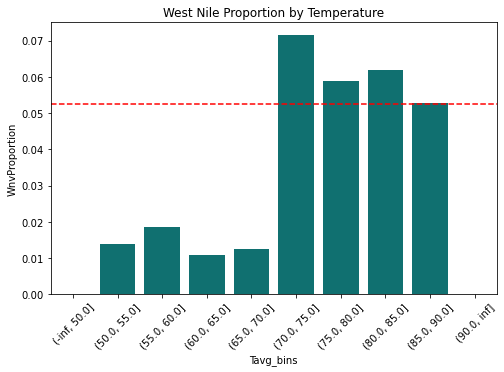

In [101]:
#Wnv Proportion by temperature

data = getWnvProportionData(df_grp,['Date','Tavg'])

temp_bins = [-np.inf,50,55,60,65,70,75,80,85,90,np.inf]
data['Tavg_bins'] = pd.cut(data['Tavg'], temp_bins)


data1 = data.groupby('Tavg_bins')['WnvProportion'].mean().reset_index()
data2 = data.groupby('Tavg_bins')['WnvProportion'].mean().reset_index()

fig,ax = plt.subplots(figsize=(8,5));
sns.barplot(data=data1, x='Tavg_bins',y='WnvProportion', ci=None, color='teal');
ax.set_title('West Nile Proportion by Temperature')
ax.tick_params(axis='x', rotation=45)
drawProportionLine(ax,wn_ppn)

West Nile presence increases sharply once the temperature hits 70 degrees. This can be reflected in an IsOptimalTemp feature.

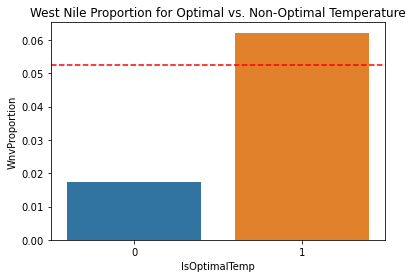

In [102]:
df['IsOptimalTemp'] = 0
df_grp['IsOptimalTemp'] = 0

df.loc[df['Tavg'] >= 70, 'IsOptimalTemp'] = 1
df_grp.loc[df_grp['Tavg'] >= 70, 'IsOptimalTemp'] = 1

data = getWnvProportionData(df_grp,'IsOptimalTemp')
sns.barplot(data=data,x='IsOptimalTemp',y='WnvProportion');
plt.gca().set_title('West Nile Proportion for Optimal vs. Non-Optimal Temperature')
drawProportionLine(plt.gca(),wn_ppn)

**Precipitation:**

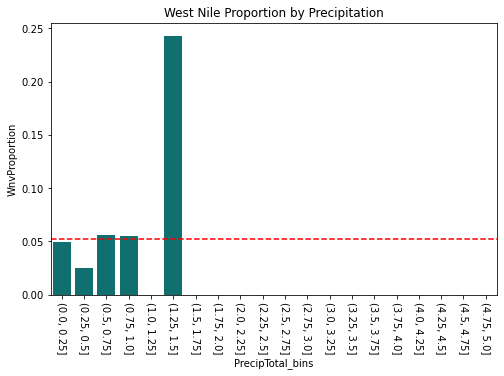

In [103]:
data = getWnvProportionData(df_grp, ['Date','PrecipTotal'])

bins = np.linspace(0,5,21)
data['PrecipTotal_bins'] = pd.cut(data['PrecipTotal'], bins)
data = data.groupby('PrecipTotal_bins')['WnvProportion'].mean().reset_index()

fig,ax = plt.subplots(figsize=(8,5));
sns.barplot(data=data, x='PrecipTotal_bins',y='WnvProportion', ci=None, color='teal');
ax.tick_params(axis='x', rotation=270)
ax.set_title('West Nile Proportion by Precipitation')
drawProportionLine(ax,wn_ppn)

West Nile proportion appears to be greatest when precipitation is in the 1.25-1.5 range. Below this range West Nile proportion is moderate and above this range it completely drops off. A PrecipConditions feature can be created.

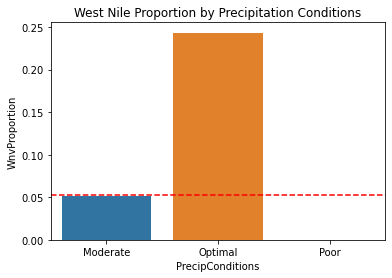

In [104]:
df['PrecipConditions'] = 'Optimal'
df.loc[df['PrecipTotal'] < 1.25, 'PrecipConditions'] = 'Moderate'
df.loc[df['PrecipTotal'] > 1.5, 'PrecipConditions'] = 'Poor'

df_grp['PrecipConditions'] = 'Optimal'
df_grp.loc[df_grp['PrecipTotal'] < 1.25, 'PrecipConditions'] = 'Moderate'
df_grp.loc[df_grp['PrecipTotal'] > 1.5, 'PrecipConditions'] = 'Poor'

data = getWnvProportionData(df_grp, 'PrecipConditions')

sns.barplot(data=data, x='PrecipConditions', y='WnvProportion');
plt.gca().set_title('West Nile Proportion by Precipitation Conditions')
drawProportionLine(plt.gca(),wn_ppn)

**Weekly Precipitation:**

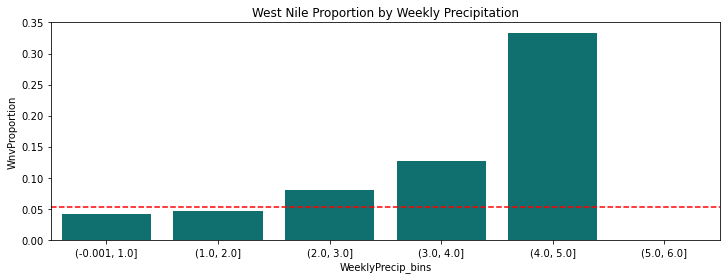

In [105]:
bins = np.linspace(0.00,6,7)
df['WeeklyPrecip_bins'] = pd.cut(df['PrecipWeekly'], bins ,include_lowest=True)
df_grp['WeeklyPrecip_bins'] = pd.cut(df_grp['PrecipWeekly'], bins ,include_lowest=True)


fig,ax=plt.subplots(figsize=(12,4))
data = getWnvProportionData(df_grp, 'WeeklyPrecip_bins')
sns.barplot(data=data, x='WeeklyPrecip_bins',y='WnvProportion', color='teal');
ax.set_title('West Nile Proportion by Weekly Precipitation');
drawProportionLine(ax,wn_ppn)

A PrecipWeekly_Score column can be created, to indicate conditions optimal for West Nile.

In [106]:
#Create PrecipWeekly_Score

#Combine 0-1 and 1-2 bins (WnvProportion is very similar)
df.loc[df['WeeklyPrecip_bins'] == pd.Interval(1.0, 2.0, closed='right'), 'WeeklyPrecip_bins'] = \
    pd.Interval(-0.001, 1.0, closed='right')
data=data.drop(index = data[data['WeeklyPrecip_bins'] == pd.Interval(1.0, 2.0, closed='right')].index)

#Assign scores
df['PrecipWeekly_Score'] = 0
for i,bin in enumerate(data.sort_values(by='WnvProportion',ascending=False)['WeeklyPrecip_bins']):
    df.loc[df['WeeklyPrecip_bins'] == bin, 'PrecipWeekly_Score'] = i+1

#Drop WeeklyPrecip_bins
df.drop(columns=['WeeklyPrecip_bins'],inplace=True)

#same for grouped dataframe

df_grp.loc[df_grp['WeeklyPrecip_bins'] == pd.Interval(1.0, 2.0, closed='right'), 'WeeklyPrecip_bins'] = \
    pd.Interval(-0.001, 1.0, closed='right')
data=data.drop(index = data[data['WeeklyPrecip_bins'] == pd.Interval(1.0, 2.0, closed='right')].index)

df_grp['PrecipWeekly_Score'] = 0
for i,bin in enumerate(data.sort_values(by='WnvProportion',ascending=False)['WeeklyPrecip_bins']):
    df_grp.loc[df_grp['WeeklyPrecip_bins'] == bin, 'PrecipWeekly_Score'] = i+1

df_grp.drop(columns=['WeeklyPrecip_bins'],inplace=True)

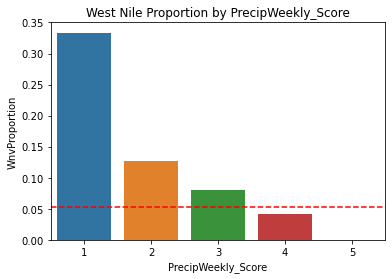

In [107]:
data = getWnvProportionData(df_grp,'PrecipWeekly_Score')
sns.barplot(data=data,x='PrecipWeekly_Score',y='WnvProportion');
drawProportionLine(plt.gca(),wn_ppn)
plt.gca().set_title('West Nile Proportion by PrecipWeekly_Score');

**Days Since Precipitation:**

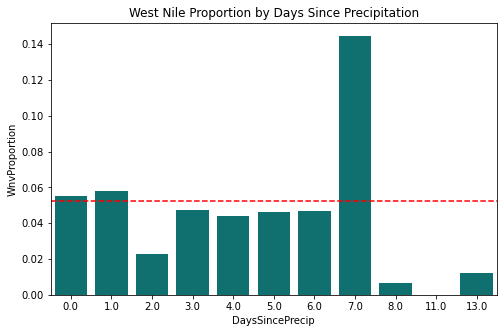

In [108]:
data = getWnvProportionData(df_grp,'DaysSincePrecip')

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=data, x='DaysSincePrecip', y='WnvProportion', color='teal');
drawProportionLine(ax,wn_ppn)
ax.set_title('West Nile Proportion by Days Since Precipitation');

West Nile proportion is particularly high when there has been no precipitation for 7 days. The proportion is moderate below 7 days and low above 7 days. A MoistureConditions feature can be created.

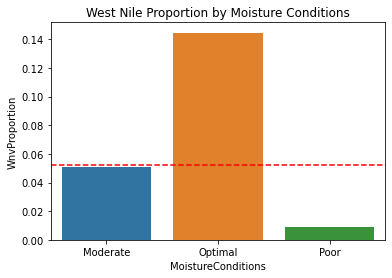

In [109]:
#Create MoistureConditions feature
df['MoistureConditions'] = 'Optimal'
df.loc[df['DaysSincePrecip'] < 7,'MoistureConditions'] = 'Moderate'
df.loc[df['DaysSincePrecip'] > 7,'MoistureConditions'] = 'Poor'

df_grp['MoistureConditions'] = 'Optimal'
df_grp.loc[df_grp['DaysSincePrecip'] < 7,'MoistureConditions'] = 'Moderate'
df_grp.loc[df_grp['DaysSincePrecip'] > 7,'MoistureConditions'] = 'Poor'



data = getWnvProportionData(df_grp,'MoistureConditions')

sns.barplot(data=data, x='MoistureConditions',y='WnvProportion');
drawProportionLine(plt.gca(),wn_ppn)
plt.gca().set_title('West Nile Proportion by Moisture Conditions');

**Wind Speed:**

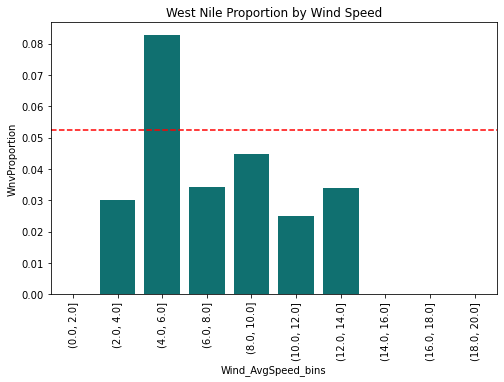

In [161]:
data = getWnvProportionData(df_grp,['Date','Wind_AvgSpeed'])

bins = np.linspace(0,20,11)
data['Wind_AvgSpeed_bins'] = pd.cut(data['Wind_AvgSpeed'], bins)

data = data.groupby('Wind_AvgSpeed_bins')['WnvProportion'].mean().reset_index()

fig,ax = plt.subplots(figsize=(8,5));
sns.barplot(data=data, x='Wind_AvgSpeed_bins',y='WnvProportion', ci=None, color='teal');
ax.tick_params(axis='x', rotation=90)
drawProportionLine(ax,wn_ppn)
ax.set_title('West Nile Proportion by Wind Speed');

WnvProportion tends to be highest at wind speeds from 4-6. It is appears to be non-existent below 2 and above 14. A WindConditions column can be created using this information.

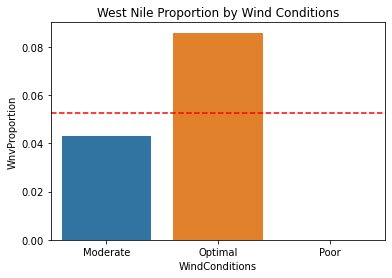

In [111]:

df['WindConditions'] = 'Moderate'
df.loc[(df['Wind_AvgSpeed'] <= 2) | (df['Wind_AvgSpeed'] > 14), 'WindConditions'] = 'Poor'
df.loc[(df['Wind_AvgSpeed'] <= 6) & (df['Wind_AvgSpeed'] > 4), 'WindConditions'] = 'Optimal'

df_grp['WindConditions'] = 'Moderate'
df_grp.loc[(df_grp['Wind_AvgSpeed'] <= 2) | (df_grp['Wind_AvgSpeed'] > 14), 'WindConditions'] = 'Poor'
df_grp.loc[(df_grp['Wind_AvgSpeed'] <= 6) & (df_grp['Wind_AvgSpeed'] > 4), 'WindConditions'] = 'Optimal'

data = getWnvProportionData(df_grp,'WindConditions')
sns.barplot(data=data,x='WindConditions',y='WnvProportion');
drawProportionLine(plt.gca(),wn_ppn)
plt.gca().set_title('West Nile Proportion by Wind Conditions');

**Station Pressure:**

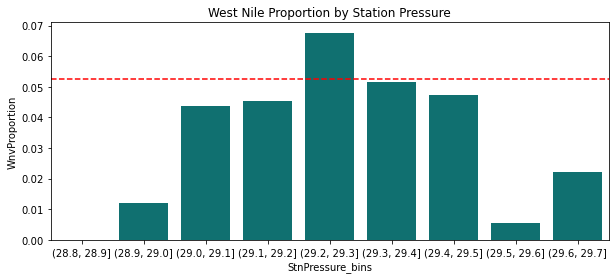

In [162]:
bins = np.linspace(28.8,29.7,10)
df_grp['StnPressure_bins'] = pd.cut(df_grp['StnPressure'],bins)

fig, ax = plt.subplots(figsize=(10,4))
data = getWnvProportionData(df_grp,'StnPressure_bins')
sns.barplot(data=data, x='StnPressure_bins',y='WnvProportion', color='teal');
drawProportionLine(ax,wn_ppn)
ax.set_title('West Nile Proportion by Station Pressure');

**Weather Codes:**

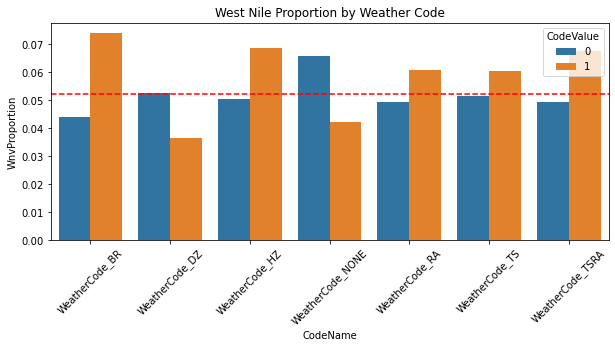

In [113]:
code_list = ['WeatherCode_BR','WeatherCode_DZ','WeatherCode_HZ','WeatherCode_NONE',
             'WeatherCode_RA','WeatherCode_TS','WeatherCode_TSRA']

data = pd.DataFrame()

for code in code_list:
    
    temp_data = pd.melt(getWnvProportionData(df_grp,code), \
                        id_vars=['NumTrapGroups','WnvProportion','NumWnvPresent'],\
                        var_name='CodeName',\
                        value_name='CodeValue')
    if data.empty:
        data = temp_data
    else:
        data = pd.concat([data,temp_data])

fig,ax = plt.subplots(figsize=(10,4))
sns.barplot(data=data, x='CodeName',y='WnvProportion',hue='CodeValue');
ax.tick_params(axis='x', rotation=45)
drawProportionLine(ax,wn_ppn)

ax.set_title('West Nile Proportion by Weather Code');

Weather codes do not appear to explain much of the difference in West Nile proportion.

**Relative Humidity:**

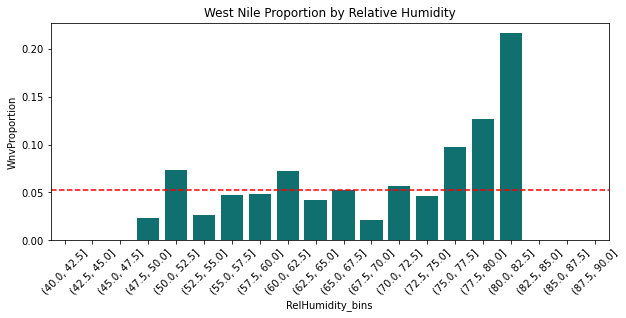

In [164]:
bins = np.linspace(40,90,21)
df_grp['RelHumidity_bins'] = pd.cut(df_grp['RelHumidity'],bins)

data = getWnvProportionData(df_grp,'RelHumidity_bins')
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=data, x='RelHumidity_bins',y='WnvProportion', color='teal');
ax.tick_params(axis='x', rotation=45)
drawProportionLine(ax,wn_ppn)
ax.set_title('West Nile Proportion by Relative Humidity');

WnvProportion appears to increase with relative humidity once relative humidity hits 75.

## 2.5.4 Rolling Weather Analysis

**Mean temperature 7,14,21,28 days:**

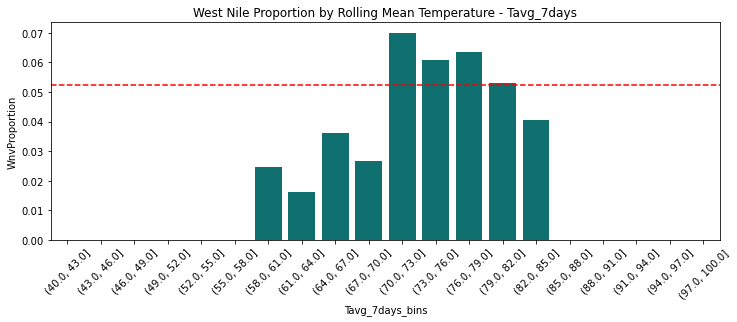

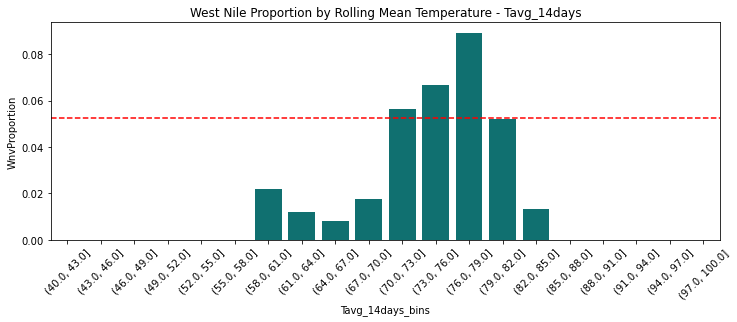

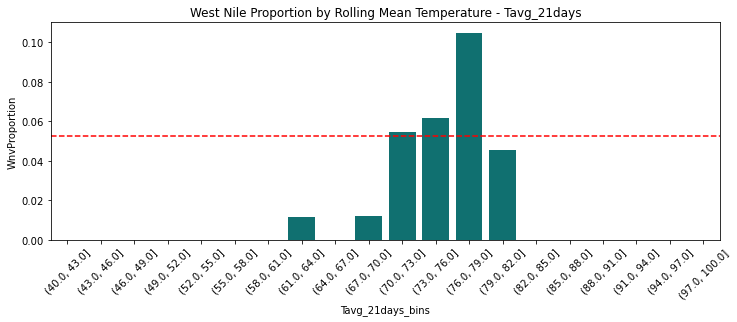

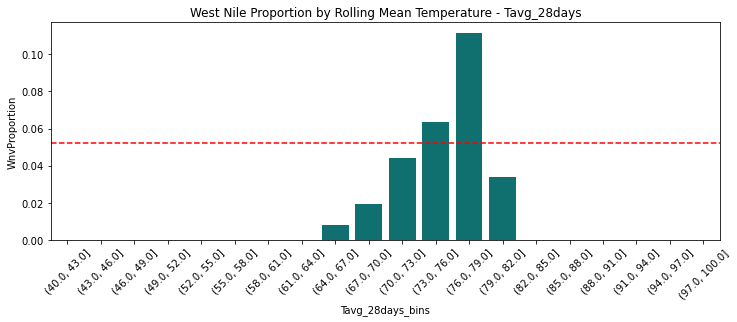

In [165]:
for column in ['Tavg_7days', 'Tavg_14days', 'Tavg_21days', 'Tavg_28days']:

    bins = np.linspace(40,100,21)
    df_grp[column + '_bins'] = pd.cut(df_grp[column], bins)

    data = getWnvProportionData(df_grp,column+'_bins')

    fig,ax=plt.subplots(figsize=(12,4))
    sns.barplot(data=data,x=column+'_bins',y='WnvProportion', color='teal');
    ax.tick_params(axis='x', rotation=45)
    drawProportionLine(ax,wn_ppn)
    ax.set_title('West Nile Proportion by Rolling Mean Temperature - ' + column);

**Mean Wind Speed 7,14,21,28 days:**

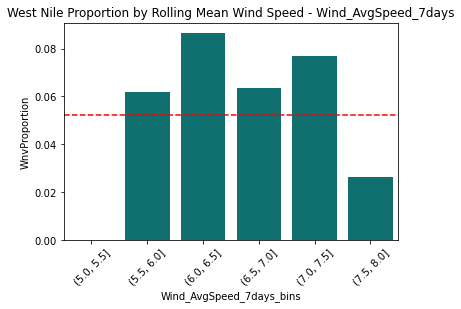

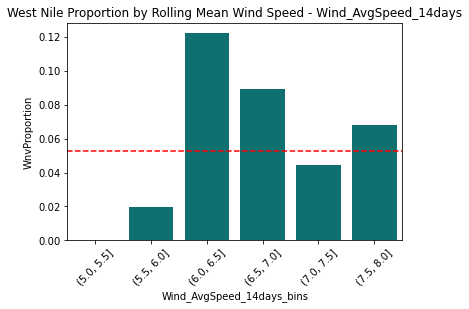

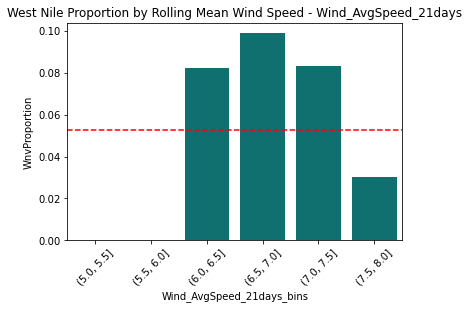

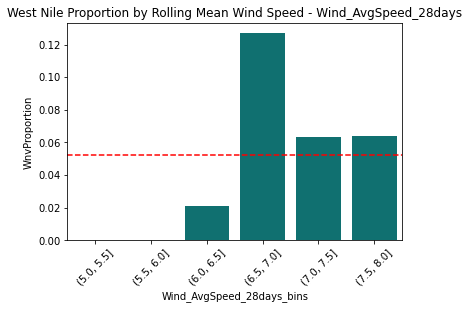

In [168]:
for column in ['Wind_AvgSpeed_7days','Wind_AvgSpeed_14days', 'Wind_AvgSpeed_21days', 'Wind_AvgSpeed_28days']:

    bins = np.linspace(5,8,7)
    df_grp[column + '_bins'] = pd.cut(df_grp[column], bins)

    data = getWnvProportionData(df_grp,column+'_bins')

    fig,ax=plt.subplots(figsize=(6,4))
    sns.barplot(data=data,x=column+'_bins',y='WnvProportion', color='teal');
    ax.tick_params(axis='x', rotation=45)
    drawProportionLine(ax,wn_ppn)
    ax.set_title('West Nile Proportion by Rolling Mean Wind Speed - ' + column);

**Mean Precipitation 7,14,21,28 days:**

In [117]:
df['PrecipTotal_7days'].describe()

count    10506.000000
mean         0.135180
std          0.183373
min          0.000000
25%          0.025714
50%          0.075714
75%          0.157143
max          1.307143
Name: PrecipTotal_7days, dtype: float64

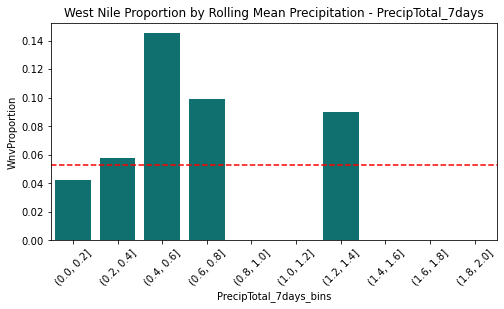

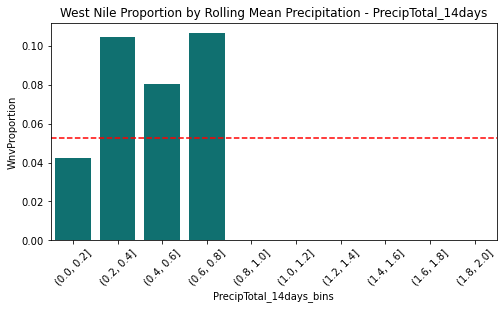

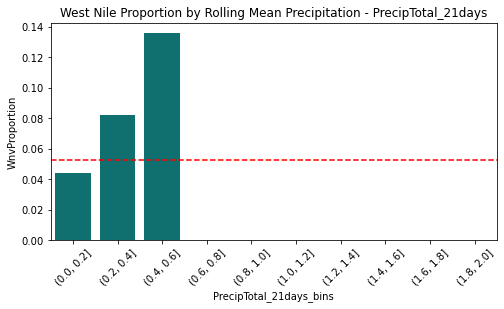

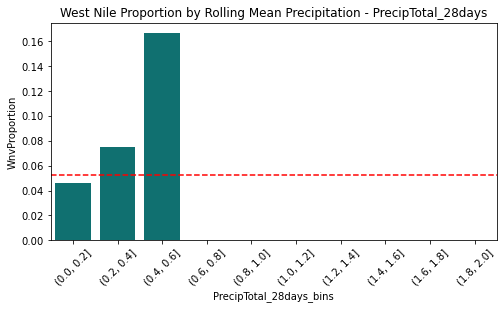

In [167]:
for column in [ 'PrecipTotal_7days', 'PrecipTotal_14days', 'PrecipTotal_21days','PrecipTotal_28days']:

    bins = np.linspace(0,2,11)
    df_grp[column + '_bins'] = pd.cut(df_grp[column], bins)

    data = getWnvProportionData(df_grp,column+'_bins')

    fig,ax=plt.subplots(figsize=(8,4))
    sns.barplot(data=data,x=column+'_bins',y='WnvProportion', color='teal');
    ax.tick_params(axis='x', rotation=45)
    drawProportionLine(ax,wn_ppn)
    
    ax.set_title('West Nile Proportion by Rolling Mean Precipitation - ' + column);

## 2.5.5 Lagged Weather Analysis

**Lagged mean temperature 7,14,21,28 days:**

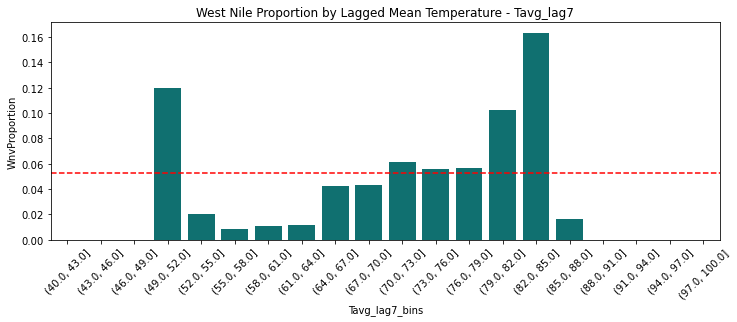

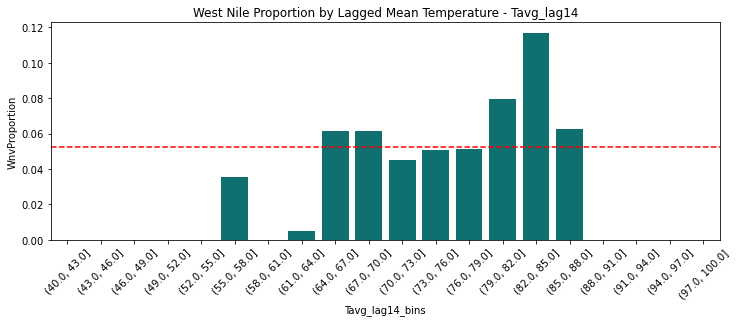

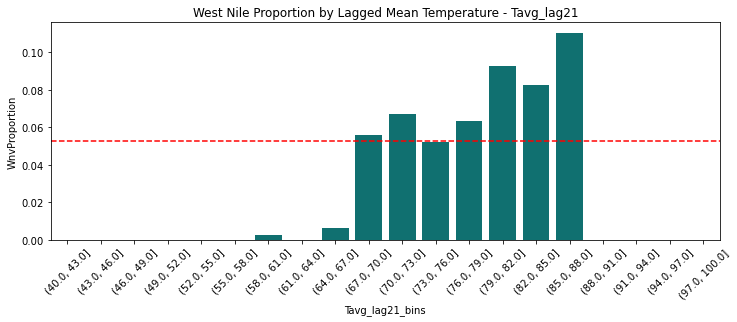

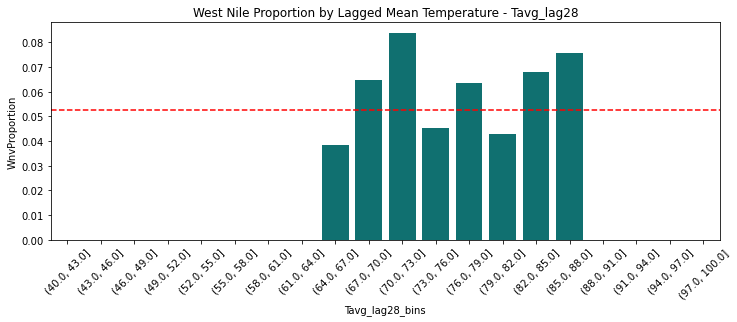

In [169]:
for column in ['Tavg_lag7', 'Tavg_lag14', 'Tavg_lag21', 'Tavg_lag28']:

    bins = np.linspace(40,100,21)
    df_grp[column + '_bins'] = pd.cut(df_grp[column], bins)

    data = getWnvProportionData(df_grp,column+'_bins')

    fig,ax=plt.subplots(figsize=(12,4))
    sns.barplot(data=data,x=column+'_bins',y='WnvProportion', color='teal');
    ax.tick_params(axis='x', rotation=45)
    drawProportionLine(ax,wn_ppn)
    ax.set_title('West Nile Proportion by Lagged Mean Temperature - ' + column);

**Lagged mean Wind Speed 7,14,21,28 days:**

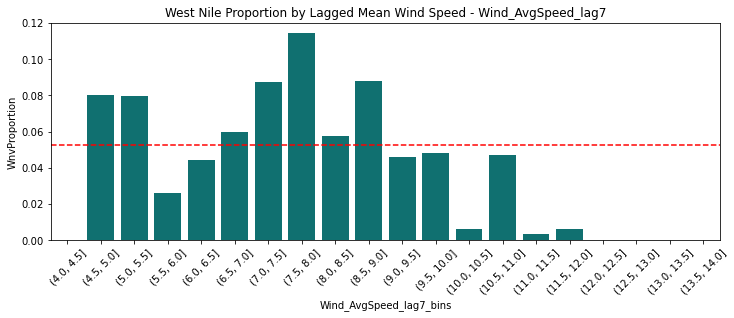

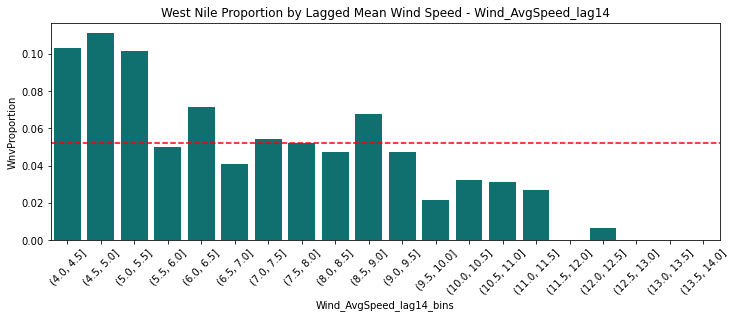

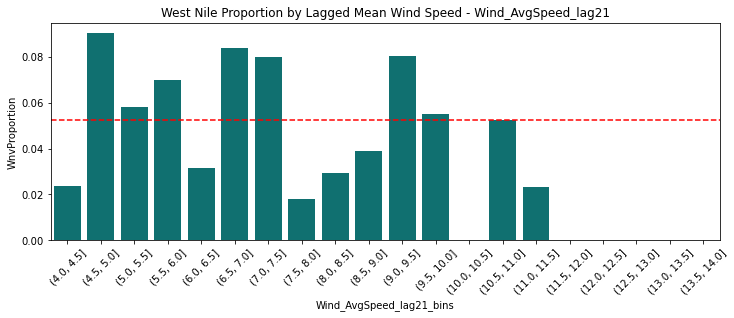

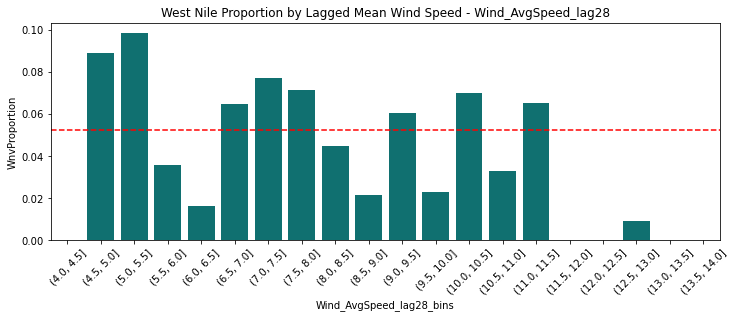

In [170]:
for column in ['Wind_AvgSpeed_lag7', 'Wind_AvgSpeed_lag14', 'Wind_AvgSpeed_lag21', 'Wind_AvgSpeed_lag28']:

    bins = np.linspace(4,14,21)
    df_grp[column + '_bins'] = pd.cut(df_grp[column], bins)

    data = getWnvProportionData(df_grp,column+'_bins')

    fig,ax=plt.subplots(figsize=(12,4))
    sns.barplot(data=data,x=column+'_bins',y='WnvProportion', color='teal');
    ax.tick_params(axis='x', rotation=45)
    drawProportionLine(ax,wn_ppn)
    ax.set_title('West Nile Proportion by Lagged Mean Wind Speed - ' + column);

**Lagged mean precipitation 7,14,21,28 days:**

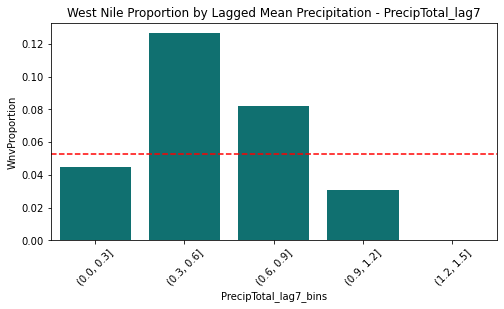

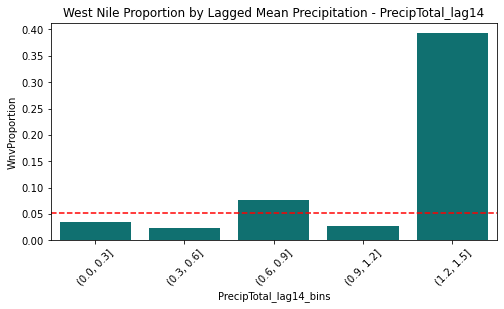

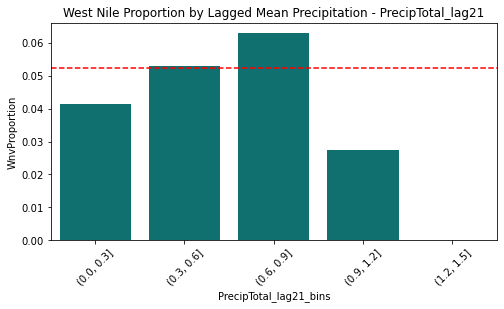

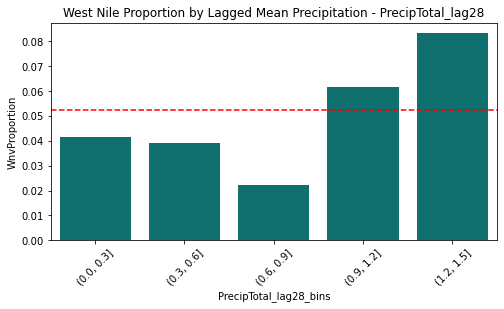

In [171]:
for column in ['PrecipTotal_lag7', 'PrecipTotal_lag14', 'PrecipTotal_lag21', 'PrecipTotal_lag28']:

    bins = np.linspace(0,1.5,6)
    df_grp[column + '_bins'] = pd.cut(df_grp[column], bins)

    data = getWnvProportionData(df_grp,column+'_bins')

    fig,ax=plt.subplots(figsize=(8,4))
    sns.barplot(data=data,x=column+'_bins',y='WnvProportion', color='teal');
    ax.tick_params(axis='x', rotation=45)
    drawProportionLine(ax,wn_ppn)
    ax.set_title('West Nile Proportion by Lagged Mean Precipitation - ' + column);

**Lagged mean daylight 7,14,21,28 days:**

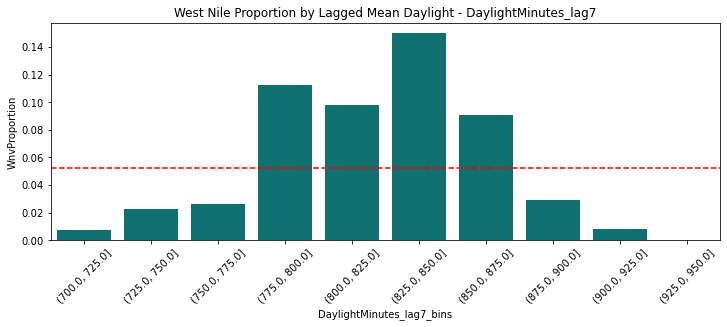

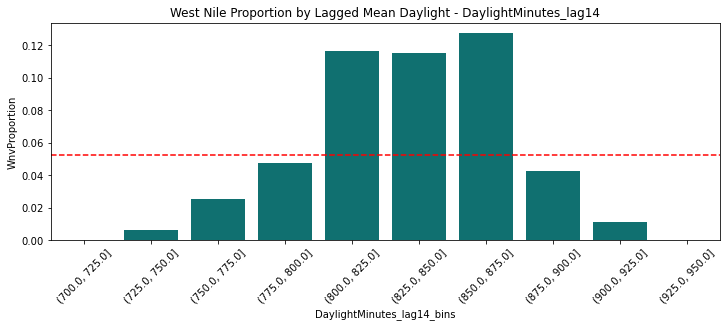

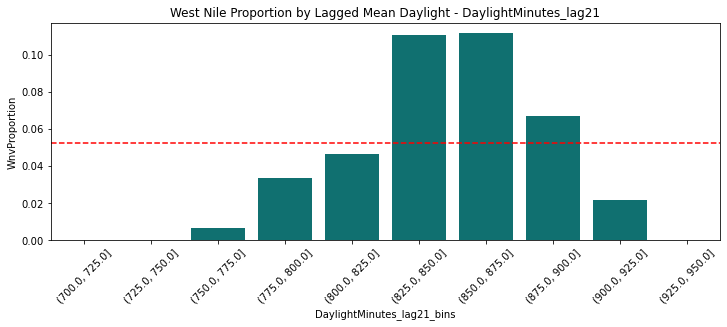

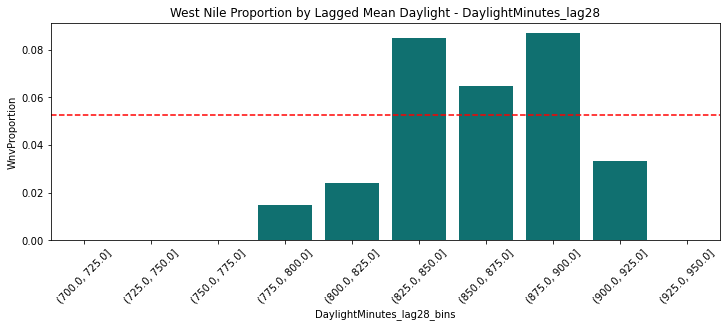

In [172]:
for column in ['DaylightMinutes_lag7', 'DaylightMinutes_lag14', 'DaylightMinutes_lag21', 'DaylightMinutes_lag28']:

    bins = np.linspace(700,950,11)
    df_grp[column + '_bins'] = pd.cut(df_grp[column], bins)

    data = getWnvProportionData(df_grp,column+'_bins')

    fig,ax=plt.subplots(figsize=(12,4))
    sns.barplot(data=data,x=column+'_bins',y='WnvProportion', color='teal');
    ax.tick_params(axis='x', rotation=45)
    drawProportionLine(ax,wn_ppn)
    
    ax.set_title('West Nile Proportion by Lagged Mean Daylight - ' + column);

## 2.5.6 Weather by Year

It was observed above that 2007, 2013 had a much higher presence of West Nile than 2009, 2011. Can this be explained by the weather?

**Temperature:**

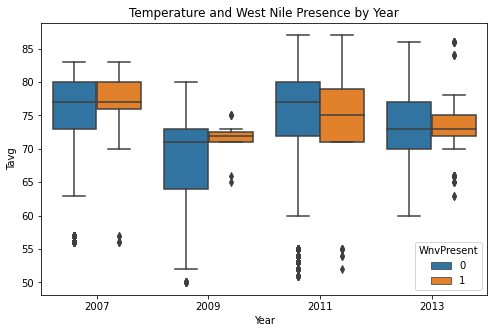

In [123]:
#Average temperature by year
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_grp,x='Year',y='Tavg',hue='WnvPresent');
ax.set_title('Temperature and West Nile Presence by Year');

Lower temperature is a possible explanation for why there was a lower West Nile presence in 2009.

**Precipitation:**

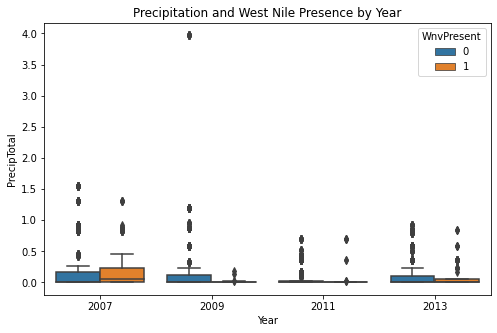

In [124]:
#Precipitation by year
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df_grp,x='Year',y='PrecipTotal',hue='WnvPresent');
ax.set_title('Precipitation and West Nile Presence by Year');

2011 had lower precipitation compared to the other years. This may explain why West Nile presence was low in 2011. 

**Wind Speed:**

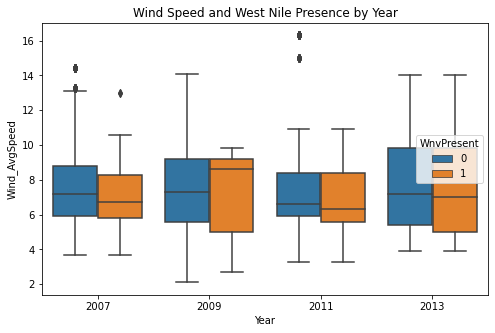

In [125]:
#Wind Speed by year
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df,x='Year',y='Wind_AvgSpeed',hue='WnvPresent');
ax.set_title('Wind Speed and West Nile Presence by Year');

As noted above, slightly lower wind speeds seem to favour West Nile. This may be due to the fact that it is easier for mosquitos to fly in lower winds, making it more likely that they will "go out" and get caught in traps.

## 2.6 Combined Trap and Spray Data Analysis

## 2.6.1 Engineer Basic Spray Features

In [126]:
#function to calculate Euclidean distance
def euclid_distance(Latitude1,Latitude2,Longitude1,Longitude2):
    return np.sqrt(np.abs(Latitude1-Latitude2)**2 + np.abs(Longitude1-Longitude2)**2)

**Is Sprayed Flag:**

In [127]:
#get all combinations of trap and spray records
trap_coordinates = df.groupby('Trap').agg({'Latitude':'first','Longitude':'first'}).reset_index()

trap_spray_combos = pd.merge(trap_coordinates.assign(dummy=1), df_spray.assign(dummy=1), on='dummy',
                    suffixes=['_trap','_spray']).drop('dummy',axis=1)

#calculate distance (Euclidean) between each trap and spray combination
trap_spray_combos['TrapSprayDistance'] = euclid_distance(trap_spray_combos['Latitude_trap'],
                                                         trap_spray_combos['Latitude_spray'],
                                                         trap_spray_combos['Longitude_trap'],
                                                         trap_spray_combos['Longitude_spray'])

#for each trap, for each spray date get the minimum distance between the trap coordinates and spray coordinates
trap_spray_distance = trap_spray_combos.groupby(['Date','Trap']).agg({'TrapSprayDistance':'min'}).reset_index()

#drop rows where traps are not near spray zones
trap_spray_distance.drop(
    trap_spray_distance[~ (trap_spray_distance['TrapSprayDistance'] < 0.0075)].index,
    inplace=True
)

#The Distance column is no longer needed
trap_spray_distance.drop(columns=['TrapSprayDistance'], inplace=True)

#add a column to indicate the date 30 days after the spray date
trap_spray_distance['SprayDatePlus30'] = trap_spray_distance['Date'] + pd.DateOffset(days=30)
trap_spray_distance.rename(columns={'Date':'SprayDate'},inplace=True)

#Initialize IsSprayed column in the traps dataframe
df['IsSprayed'] = 0
df_grp['IsSprayed'] = 0

#temporarily use the index as a column so that all rows are unique
df = df.reset_index()

#Merge the spray data with the trap data
df = pd.merge(df,trap_spray_distance,left_on='Trap',right_on='Trap',how='left')
df_grp = pd.merge(df_grp,trap_spray_distance,left_on='Trap',right_on='Trap',how='left')

#set the indicator to 1 for sprayed traps: 
# assume traps within spray region are sprayed if it is within 30 days of the spraying
df.loc[(df['SprayDate'] < df['Date']) & 
             (df['Date'] < df['SprayDatePlus30']),
            'IsSprayed'] = 1
df_grp.loc[(df_grp['SprayDate'] < df_grp['Date']) & 
             (df_grp['Date'] < df_grp['SprayDatePlus30']),
            'IsSprayed'] = 1

#drop the unneeded columns
df.drop(columns=['SprayDate','SprayDatePlus30'],inplace=True)
df_grp.drop(columns=['SprayDate','SprayDatePlus30'],inplace=True)

#drop the duplicate rows resulting from the merge
df.drop_duplicates(inplace=True)
df_grp.drop_duplicates(inplace=True)

#drop the temporary index column
df.drop(columns='index',inplace=True)

**Spray Distances:**

In [128]:
#get all combinations of trap and spray records
trap_coordinates = df.groupby(['Trap']).agg({'Latitude':'first','Longitude':'first'}).reset_index()

trap_spray_combos = pd.merge(trap_coordinates.assign(dummy=1), df_spray.assign(dummy=1), on='dummy',
                    suffixes=['_trap','_spray']).drop('dummy',axis=1)

#calculate distance (Euclidean) between each trap and spray combination
trap_spray_combos['TrapSprayDistance'] = euclid_distance(trap_spray_combos['Latitude_trap'],
                                                         trap_spray_combos['Latitude_spray'],
                                                         trap_spray_combos['Longitude_trap'],
                                                         trap_spray_combos['Longitude_spray'])

#for each trap, for each spray date get the minimum distance between the trap coordinates and spray coordinates
trap_spray_distance = trap_spray_combos.groupby(['Date','Trap']) \
    .agg({'TrapSprayDistance':'min'}) \
    .reset_index() \
    .rename(columns={'Date':'SprayDate'})

#merge the spray distances
spray_dates = pd.DataFrame(trap_spray_distance['SprayDate'].unique()).rename(columns={0:'SprayDate'})

df = pd.merge_asof(df,spray_dates,left_on='Date',right_on='SprayDate')
df = pd.merge(df, trap_spray_distance, on=['SprayDate','Trap'], how='left')
df['TrapSprayDistance'] = df['TrapSprayDistance'].fillna(value=df['TrapSprayDistance'].max())

df_grp = pd.merge_asof(df_grp,spray_dates,left_on='Date',right_on='SprayDate')
df_grp = pd.merge(df_grp, trap_spray_distance, on=['SprayDate','Trap'], how='left')
df_grp['TrapSprayDistance'] = df_grp['TrapSprayDistance'].fillna(value=df_grp['TrapSprayDistance'].max())

**Days Since Last Spray:**

In [129]:
df['DaysSinceSpray'] = df['Date'] - df['SprayDate']
df_grp['DaysSinceSpray'] = df_grp['Date'] - df_grp['SprayDate']

#Fill null days (the days before the first spray took place)
days_365 = dt.timedelta(days=365)
df['DaysSinceSpray'] = df['DaysSinceSpray'].fillna(value=days_365)
df['DaysSinceSpray'] = df['DaysSinceSpray'].dt.days

df_grp['DaysSinceSpray'] = df_grp['DaysSinceSpray'].fillna(value=days_365)
df_grp['DaysSinceSpray'] = df_grp['DaysSinceSpray'].dt.days

df.drop(columns='SprayDate',inplace=True)
df_grp.drop(columns='SprayDate',inplace=True)

**InSprayBounds:**

An InSprayBounds flag will indicate that a trap was within the max/min latitude/longitude boundaries of all spray zones (up to that point in the year)

In [130]:
#Create InSprayBounds column
spray_bounds = df_spray.groupby('Date').agg({'Latitude':['min','max'],'Longitude':['min','max']})
spray_bounds.columns = ['Latitude_min','Latitude_max','Longitude_min','Longitude_max']
spray_bounds = spray_bounds.reset_index()

#get updated SprayBounds coordinates after each spray date
spray_bounds['Year_temp'] = spray_bounds['Date'].dt.year

for i in range(spray_bounds.shape[0]):
    if (i==0):
        continue
        
    if (spray_bounds.loc[i,'Year_temp'] != spray_bounds.loc[i-1,'Year_temp']):
        continue
        
    if (spray_bounds.loc[i,'Latitude_min'] > spray_bounds.loc[i-1,'Latitude_min']):
        spray_bounds.loc[i,'Latitude_min'] = spray_bounds.loc[i-1,'Latitude_min']
        
    if (spray_bounds.loc[i,'Longitude_min'] > spray_bounds.loc[i-1,'Longitude_min']):
        spray_bounds.loc[i,'Longitude_min'] = spray_bounds.loc[i-1,'Longitude_min']
        
    if (spray_bounds.loc[i,'Latitude_max'] < spray_bounds.loc[i-1,'Latitude_max']):
        spray_bounds.loc[i,'Latitude_max'] = spray_bounds.loc[i-1,'Latitude_max']
        
    if (spray_bounds.loc[i,'Longitude_max'] < spray_bounds.loc[i-1,'Longitude_max']):
        spray_bounds.loc[i,'Longitude_max'] = spray_bounds.loc[i-1,'Longitude_max']

spray_bounds.drop(columns='Year_temp',inplace=True)

#merge the most current spray bound coordinates for each date
df_list = []
for year in df['Date'].dt.year.unique():
    temp_df_year = pd.merge_asof(df[df['Date'].dt.year==year],spray_bounds[spray_bounds['Date'].dt.year==year])
    df_list.append(temp_df_year)
    
temp_df = pd.concat(df_list)
temp_df = temp_df.reset_index(drop=True)

#set InSprayBounds to 1 if coordinates are in the spray bounds, otherwise 0
temp_df['InSprayBounds'] = np.where(((temp_df['Latitude'] >= temp_df['Latitude_min']) &
                                    (temp_df['Latitude'] <= temp_df['Latitude_max']) &
                                    (temp_df['Longitude'] >= temp_df['Longitude_min']) &
                                    (temp_df['Longitude'] <= temp_df['Longitude_max'])), 
                                    1,0)

#drop the temporary columns
temp_df.dropna(axis=1, inplace=True)
df = temp_df

#same for the grouped data
df_list = []
for year in df_grp['Date'].dt.year.unique():
    temp_df_year = pd.merge_asof(df_grp[df_grp['Date'].dt.year==year],spray_bounds[spray_bounds['Date'].dt.year==year])
    df_list.append(temp_df_year)
    
temp_df = pd.concat(df_list)
temp_df = temp_df.reset_index(drop=True)

#set InSprayBounds to 1 if coordinates are in the spray bounds, otherwise 0
temp_df['InSprayBounds'] = np.where(((temp_df['Latitude'] >= temp_df['Latitude_min']) &
                                    (temp_df['Latitude'] <= temp_df['Latitude_max']) &
                                    (temp_df['Longitude'] >= temp_df['Longitude_min']) &
                                    (temp_df['Longitude'] <= temp_df['Longitude_max'])), 
                                    1,0)

#drop the temporary columns
temp_df.dropna(axis=1, inplace=True)
df_grp = temp_df

## 2.6.2 Effects of Spray

**Number of mosquitos caught in sprayed traps over time:**

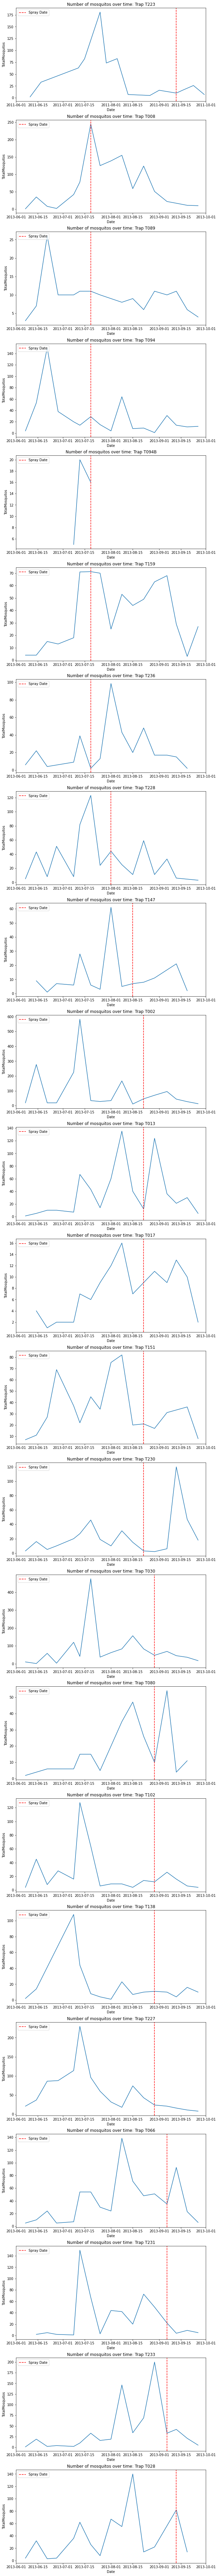

In [134]:
sprayed_traps = df_grp[df_grp['IsSprayed'] == 1]['Trap'].unique()
figsize = (10, len(sprayed_traps)*6)
fig, ax = plt.subplots(len(sprayed_traps),1, figsize=figsize)
ax_count = 0
for trap in sprayed_traps:
    sprayed_years = df_grp[(df_grp['Trap'] == trap) & (df_grp['IsSprayed'] == 1)]['Year'].unique()
    for year in sprayed_years:
        data = df_grp[(df_grp['Trap']==trap) & (df_grp['Year'] == year)]
        data = data.groupby('Date').agg({'NumMosquitos':'mean','NumTrapGroups':'sum','IsSprayed':'max'}).reset_index()
        data['TotalMosquitos'] = data['NumMosquitos'] * data['NumTrapGroups']
        first_after_spray_date = data[data['IsSprayed'] == 1]['Date'].min()
        
        start_date = dt.date(year,6,1)
        end_date = dt.date(year,10,1)
        ax[ax_count].set_xlim([start_date,end_date])
        
        sns.lineplot(data=data, x='Date',y='TotalMosquitos', ci=None, ax=ax[ax_count]);
        ax[ax_count].axvline(first_after_spray_date, color='red', linestyle='--', label='Spray Date')
        ax[ax_count].set_title('Number of mosquitos over time: Trap ' + str(trap))
        ax[ax_count].legend(loc='upper left')
        ax_count += 1

Spraying did not seem to have a predictable effect on mosquito count over time. This could be because the traps are not always checked right after being sprayed.

**Number of mosquitos and WnvProportion - before/after spray:**

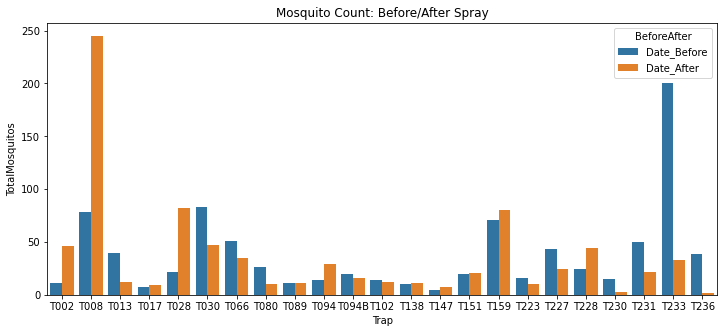

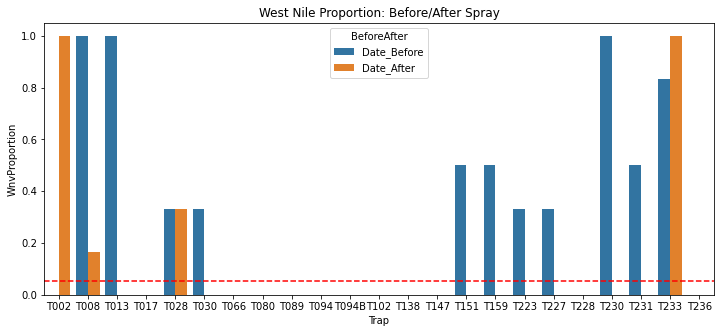

In [140]:
spray_before_after = df_grp[df_grp['IsSprayed'] == 1].groupby('Trap').agg({'Date':'min'}).reset_index()
spray_before_after = spray_before_after.rename(columns={'Date':'Date_After'})
spray_before_after = pd.merge(spray_before_after, df_grp[['Trap','Date']], on='Trap', how='left')


#Drop rows where Date >= First_Spray_Date
drop_indices = spray_before_after[spray_before_after['Date'] >= spray_before_after['Date_After']].index
spray_before_after = spray_before_after.drop(drop_indices)
spray_before_after = spray_before_after.groupby('Trap').agg({'Date_After':'first', 'Date':'max'}).reset_index()

#Drop rows where before date >14 days before
spray_before_after = spray_before_after.rename(columns={'Date':'Date_Before'})
spray_before_after = spray_before_after[ \
    (spray_before_after['Date_After'] - spray_before_after['Date_Before']).dt.days <= 14]

#get mosquito counts
spray_before_after = pd.melt(spray_before_after, id_vars='Trap') \
    .rename(columns={'variable':'BeforeAfter','value':'Date'})
spray_before_after = pd.merge(spray_before_after, \
    df_grp[['Trap','Date','NumMosquitos','NumTrapGroups','NumWnvPresent']], \
    on=['Trap','Date'])
spray_before_after['TotalMosquitos'] = spray_before_after['NumTrapGroups'] * spray_before_after['NumMosquitos']
spray_before_after['WnvProportion'] = spray_before_after['NumWnvPresent'] / spray_before_after['NumTrapGroups']
spray_before_after = \
    spray_before_after.groupby(['Trap','Date','BeforeAfter'])\
    .agg({'TotalMosquitos':'sum','WnvProportion':'mean'})\
    .reset_index()

#check mosquito differences
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=spray_before_after, x='Trap', y='TotalMosquitos', hue='BeforeAfter');
ax.set_title('Mosquito Count: Before/After Spray');

#check Wnv Proportion Differences
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=spray_before_after, x='Trap', y='WnvProportion', hue='BeforeAfter');
ax.set_title('West Nile Proportion: Before/After Spray');
drawProportionLine(ax,wn_ppn)

Interestingly, although spraying does not necessarily seem to reduce the number of mosquitos it does seem to reduce the proportion of traps containing West Nile. It is possible that mosquitos breed more quickly than the rate at which West Nile propagates through their population. This would mean that by the time traps are checked, mosquitos have had time to regenerate their numbers but West Nile has not yet had a chance to reach prior levels.

**Impact on traps with in the spray bounds:**

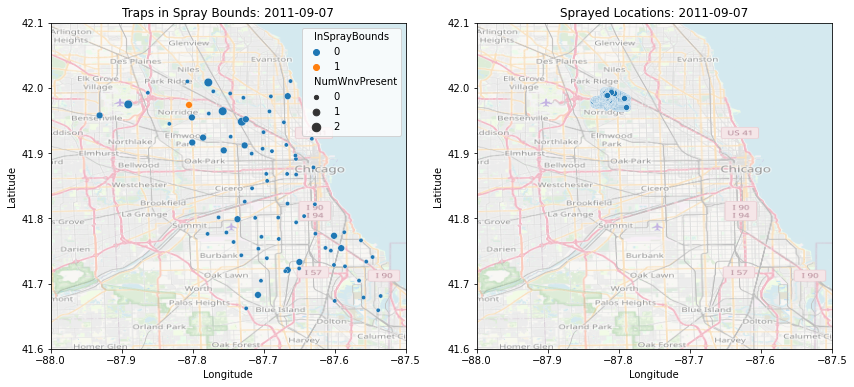

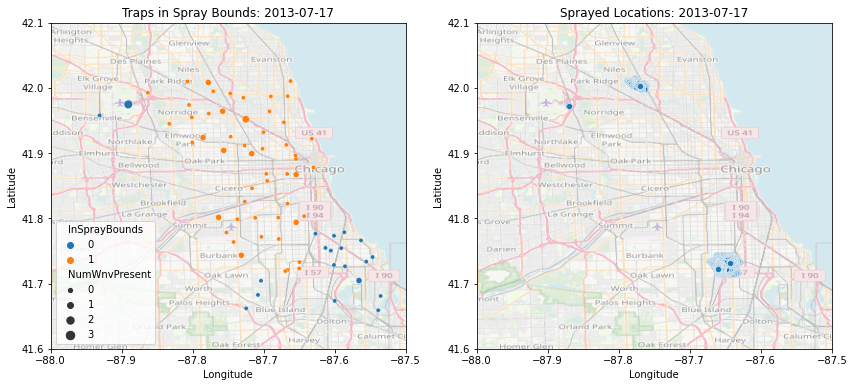

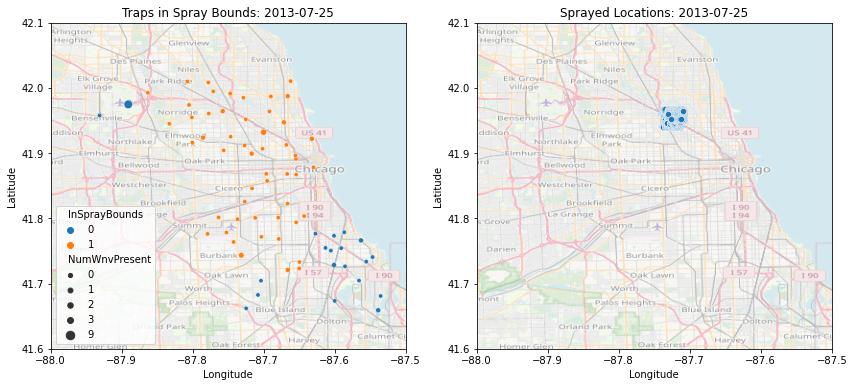

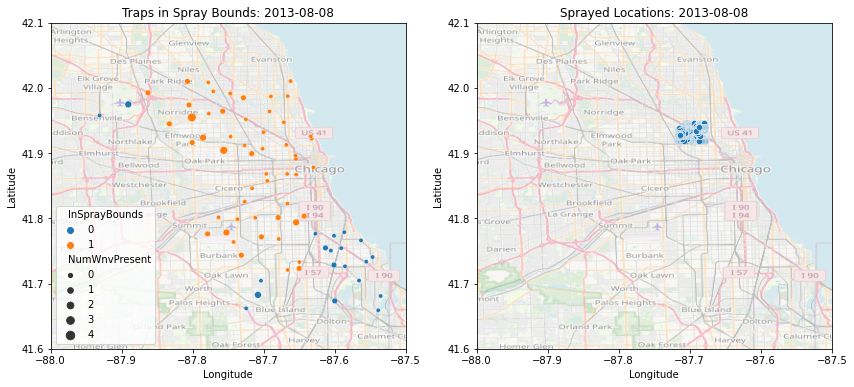

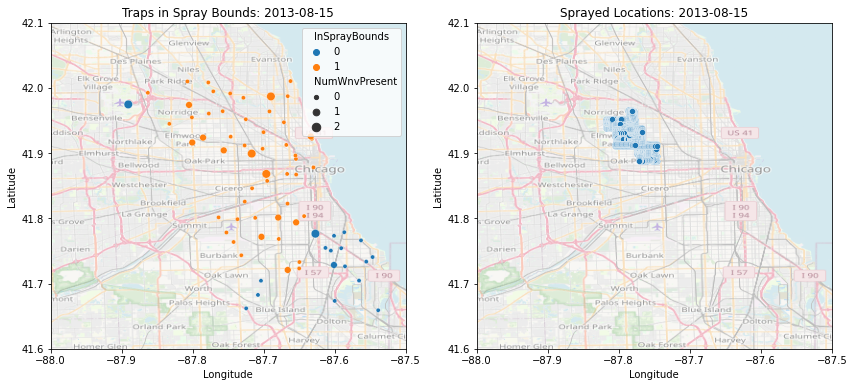

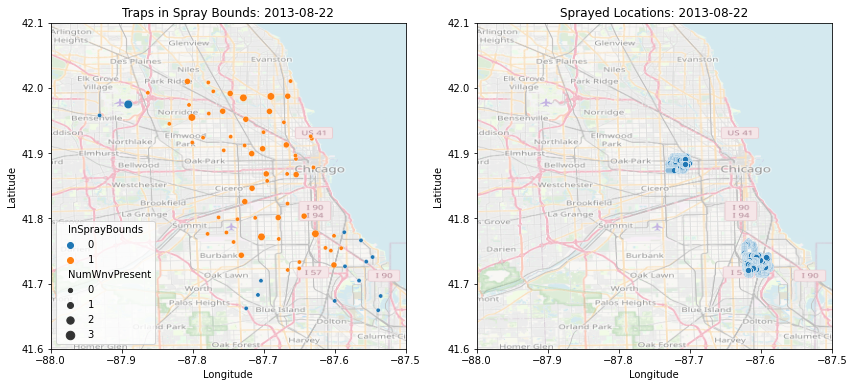

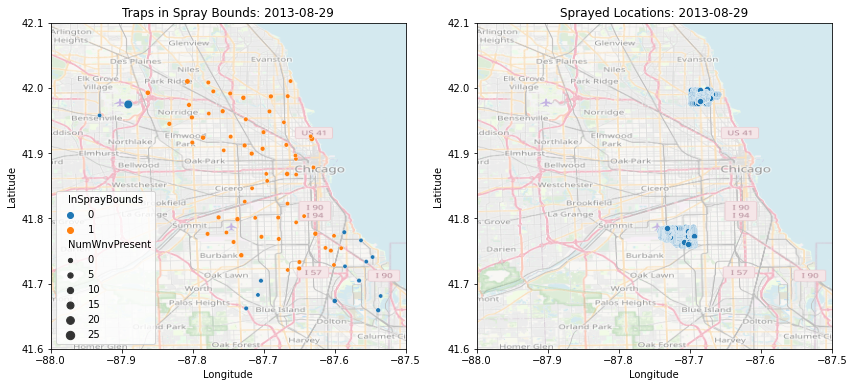

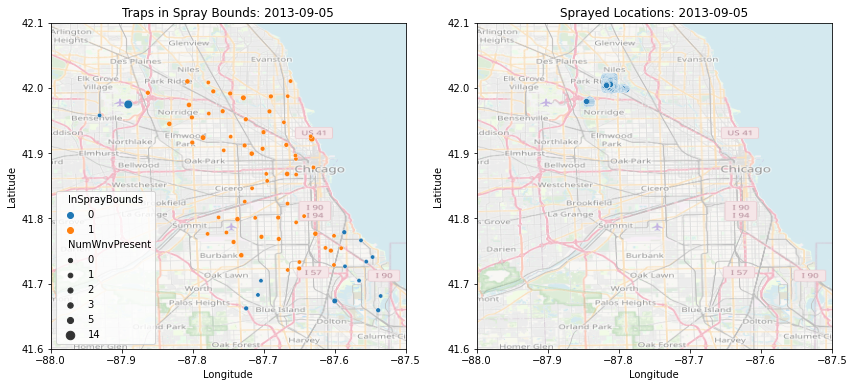

In [152]:
#Check the impact of InSprayBounds on West Nile Presence
for i in range(len(df_spray['Date'].unique())):
    date = df_spray['Date'].unique()[i]
    
    if (i < len(df_spray['Date'].unique()) - 2):
        next_date = df_spray['Date'].unique()[i+1]
    else:
        next_date = df_grp['Date'].max()
    
    temp_df = df_grp[(df_grp['Date'] >= date) & (df_grp['Date'] < next_date)]
    
    if (temp_df.shape[0] > 0):
    
        temp_df = temp_df.groupby('Trap').agg({'Latitude':'first','Longitude':'first','InSprayBounds':'max',
                                               'NumWnvPresent':'sum'}) \
            .reset_index()

        fig, ax = plt.subplots(1,2, figsize = (14,6));
        for a in ax:
            a.set_xlim(BBox[0], BBox[1])
            a.set_ylim(BBox[2], BBox[3])
            a.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');
        
        
        dt = pd.to_datetime(str(date)) 
        dt_string = dt.strftime('%Y-%m-%d')
        
        sns.scatterplot(data=temp_df, x='Longitude', y='Latitude', hue='InSprayBounds', size='NumWnvPresent', ax=ax[0]);
        ax[0].set_title('Traps in Spray Bounds: ' + dt_string)
        sns.scatterplot(data=df_spray[df_spray['Date'] == date], x='Longitude', y='Latitude', ax=ax[1])
        ax[1].set_title('Sprayed Locations: ' + dt_string)
        

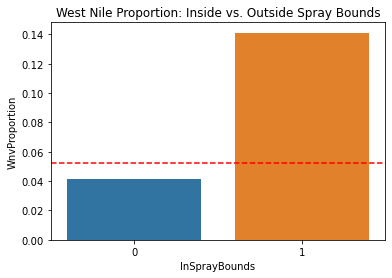

In [154]:
#Check WnvProportion for InSprayBound groups
data = df_grp.groupby('InSprayBounds').agg({'NumTrapGroups':'sum','NumWnvPresent':'sum'}).reset_index()
data['WnvProportion'] = data.apply(lambda x : x['NumWnvPresent'] / x['NumTrapGroups'], axis=1)

sns.barplot(data=data, x='InSprayBounds', y='WnvProportion');
drawProportionLine(plt.gca(), wn_ppn)

plt.gca().set_title('West Nile Proportion: Inside vs. Outside Spray Bounds');

**Effects of trap's proximity to spray zone:**

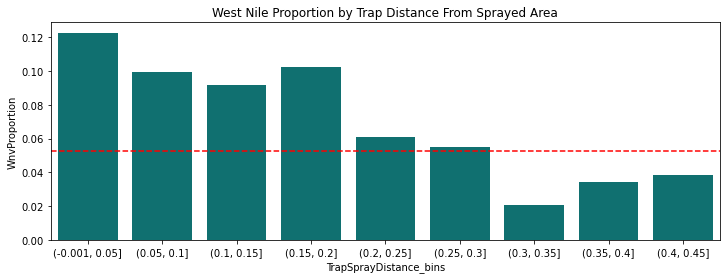

In [173]:
#look at West Nile Proportion by spray distance
bins = np.linspace(0,0.45,10)
df_grp['TrapSprayDistance_bins'] = pd.cut(df_grp['TrapSprayDistance'], bins, include_lowest=True)

data = getWnvProportionData(df_grp, 'TrapSprayDistance_bins')

fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=data, x='TrapSprayDistance_bins', y='WnvProportion', color='teal');

df_grp.drop(columns=['TrapSprayDistance_bins'],inplace=True)
drawProportionLine(ax, wn_ppn)

ax.set_title('West Nile Proportion by Trap Distance From Sprayed Area');

West Nile proportion is higher in traps that are close to spray zones. This makes sense because locations with higher West Nile proportions are likely targeted for spray. A feature can be designed to reflect this.

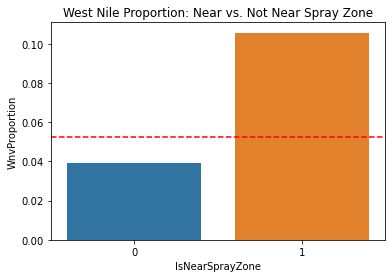

In [156]:
#Create IsNearSprayZone
df['IsNearSprayZone'] = 0
df.loc[df['TrapSprayDistance'] <= 0.2, 'IsNearSprayZone'] = 1

df_grp['IsNearSprayZone'] = 0
df_grp.loc[df_grp['TrapSprayDistance'] <= 0.2, 'IsNearSprayZone'] = 1

data = getWnvProportionData(df_grp,'IsNearSprayZone')
sns.barplot(data=data,x='IsNearSprayZone',y='WnvProportion');
drawProportionLine(plt.gca(), wn_ppn)

plt.gca().set_title('West Nile Proportion: Near vs. Not Near Spray Zone');

**Impact of days since spray:**

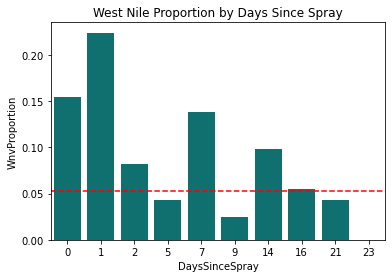

In [174]:
#look at West Nile Proportion by days since spray
data = getWnvProportionData(df_grp[df_grp['DaysSinceSpray'] < 50], 'DaysSinceSpray')
sns.barplot(data=data, x='DaysSinceSpray', y='WnvProportion', color='teal');
drawProportionLine(plt.gca(), wn_ppn)
plt.gca().set_title('West Nile Proportion by Days Since Spray');

It appears that when Days Since Spray is low, especially 0-1 days, West Nile proportion is high. This likely indicates that spray is a response to high levels of West Nile. When DaysSinceSpray = 0, it is possible that the traps were checked prior to the spraying. When there has been 1 day since spraying, the spray may not have had time to take effect. A feature can be designed to reflect this. 

West Nile proportion is also higher after 7 and 14 days. Since this corresponds to 1 and 2 weeks, it could have be related to the trap checking schedule.

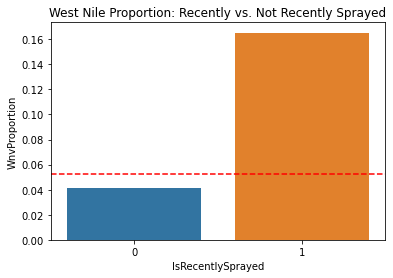

In [158]:
#Create IsRecentlySprayed feature
df['IsRecentlySprayed'] = 0
df.loc[df['DaysSinceSpray'] <= 1, 'IsRecentlySprayed'] = 1

df_grp['IsRecentlySprayed'] = 0
df_grp.loc[df_grp['DaysSinceSpray'] <= 1, 'IsRecentlySprayed'] = 1

data = getWnvProportionData(df_grp,'IsRecentlySprayed')
sns.barplot(data=data,x='IsRecentlySprayed',y='WnvProportion');
drawProportionLine(plt.gca(), wn_ppn)
plt.gca().set_title('West Nile Proportion: Recently vs. Not Recently Sprayed');

The IsRecentlySprayed feature reflects traps that are in close proximity to a spray zone, that was recently sprayed.

**Combined impact of a trap's proximity to spray and days since spray:**

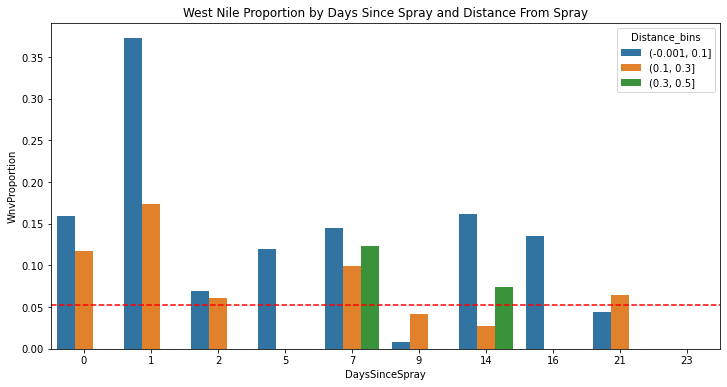

In [159]:
#Take both distance and days since spray into account
data = getWnvProportionData(df_grp[df_grp['DaysSinceSpray'] < 50] , ['DaysSinceSpray','TrapSprayDistance'])

bins=[0,0.1,0.3,0.5]
data['Distance_bins'] = pd.cut(data['TrapSprayDistance'],bins, include_lowest=True)

fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=data, x='DaysSinceSpray', y='WnvProportion', hue='Distance_bins',ci=None);
drawProportionLine(ax, wn_ppn)

ax.set_title('West Nile Proportion by Days Since Spray and Distance From Spray');

There was an extremely high West Nile proportion in traps very close to the spray zone, one day after spraying. This can be reflected in a new feature.

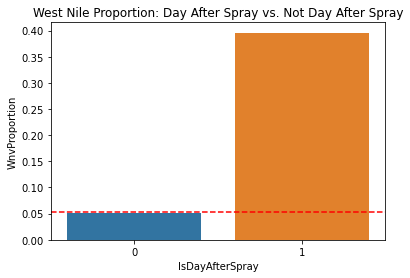

In [160]:
#Create IsDayAfterSpray feature
df['IsDayAfterSpray'] = 0
df.loc[(df['DaysSinceSpray'] == 1) & (df['TrapSprayDistance'] <= 0.1), 'IsDayAfterSpray'] = 1

df_grp['IsDayAfterSpray'] = 0
df_grp.loc[(df_grp['DaysSinceSpray'] == 1) & (df_grp['TrapSprayDistance'] <= 0.1), 'IsDayAfterSpray'] = 1

data = getWnvProportionData(df_grp,'IsDayAfterSpray')
sns.barplot(data=data,x='IsDayAfterSpray',y='WnvProportion');
drawProportionLine(plt.gca(), wn_ppn)
plt.gca().set_title('West Nile Proportion: Day After Spray vs. Not Day After Spray');

## 2.7 Selected and Engineered Features

The following features will be considered for modeling: 

**Mosquito Features:**
* Species
* NumMosquitos
* WnvPresent (target feature)


**Location Features:**
* IsDowntownCore - downtown area with lower proportion of West Nile
* IsNorthWestZone - area to the northwest with a high proportion of West Nile
* IsNorthEastZone - area to the northeast with a low proportion of West Nile
* TrapZone - indicates which zone on the map the trap belongs to (the map is broken into a grid of zones: each zone is 0.5 degrees in latitude and 0.5 degrees in longitude)

**Seasonality Features:**
* IsInSeason - indicates whether or not West Nile season has started (>= July 15th)
* Month - month of the year
* Week - week of the year
* IsPeakSeason - indicates the peak season for West Nile (week 31 - week 37)
* DaylightMinutes - total minutes of daylight

**Weather Features:**
* Tmax - maximum temperature 
* Tmin - minimum temperature 
* Tavg - average daily temperature 
* Tdepart - departure from normal temperature 
* Tdew_point - dew point temperature 
* Twet_bulb - wet bulb temperature 
* HeatDegDays - heating degree days
* CoolDegDays - cooling degree days
* PrecipTotal - total daily precipitation
* StnPressure - average pressure at the weather station
* Wind_AvgSpeed - average daily wind speeed
* WeatherCode_BR - indicates mist 
* WeatherCode_DZ - indicates drizzle
* WeatherCode_HZ - indicates haze
* WeatherCode_NONE - no weather code indicates moderate weather
* WeatherCode_RA - indicates rain
* WeatherCode_TS - indicates thunderstorm
* WeatherCode_TSRA - indicates thunderstorm and rain
* DaysSincePrecip - indicates number of days since the last precipitation event
* PrecipWeekly - indicates total precipitation for the week
* IsOptimalTemp - indicates temperature >= 70
* PrecipConditions - Optimal (1.25 <= daily precipitation <= 1.5), Moderate (daily precipitation < 1.25), Poor (daily precipitation > 1.5)
* PrecipWeekly_Score - Assigns a score from 1-5 based on the weekly precipitation: 1 is most likely to find West Nile, 5 is least likely
* MoistureConditions - Optimal (DaysSincePrecip = 7), Moderate (DaysSincePrecip < 7), Poor (DaysSincePrecip > 7)
* WindConditions - Optimal (4 < Wind_AvgSpeed <= 6), Poor (Wind_AvgSpeed <= 2 or Wind_AvgSpeed > 14), Moderate (Wind_AvgSpeed is not Poor or Optimal)
* RelHumidity - relative humidity

**Rolling Averages:**
* Tavg_**n**days - rolling average daily temperature (7, 14, 21, and 28 days)
* Wind_AvgSpeed_**n**days - rolling average daily wind speed (7, 14, 21, and 28 days)
* PrecipTotal_**n**days - rolling average precipitation (7, 14, 21, and 28 days)
* RelHumidity_**n**days - rolling average relative humidity (7, 14, 21, and 28 days)

*Note: for each rolling average feature, replace "n" with number of days*

**Time lag features:**
* Tavg_lag**n** - time lagged mean temperature (1-28 days back)
* Wind_AvgSpeed_lag**n** - time lagged mean wind speed (1-28 days back)
* Preciptotal_lag**n** - time lagged mean precipitation (1-28 days back)
* DaylightMinutes_lag**n** - time lagged daylight minutes (1-28 days back)
* RelHumidity_lag**n** - time lagged relative humidity (1-28 days back)

*Note: for each time lag feature, replace "n" with number of days*

**Time lag features - mean lagged features:**
* Tavg_lag**n**_mean - time lagged mean temperature (7-14 days back, 14-21 days back, 21-28 days back, 28-35 days back)
* Wind_AvgSpeed_lag**n**_mean - time lagged mean wind speed (7-14 days back, 14-21 days back, 21-28 days back, 28-35 days back)
* PrecipTotal_lag**n**_mean - time lagged mean precipitation (7-14 days back, 14-21 days back, 21-28 days back, 28-35 days back)
* DaylightMinutes_lag**n**_mean - time lagged mean daylight minutes (7-14 days back, 14-21 days back, 21-28 days back, 28-35 days back)
* RelHumidity_lag**n**_mean - time lagged mean relative humidity (7-14 days back, 14-21 days back, 21-28 days back, 28-35 days back)

*Note: for each mean time lag feature, replace "n" with number of days*


**Spray Features:**
* IsSprayed - indicates the trap has been sprayed within the last 30 days
* TrapSprayDistance - indicates the trap's distance from the most recent sprayed
* DaysSinceSpray - indicates the number of days since the last spraying
* InSprayBounds - indicates that the trap was within the max/min latitude/longitude boundaries of all spray zones (up to that point in the year)
* IsNearSprayZone - indicates whether or not a trap is near a spray zone
* IsRecentlySprayed - indicates that it has been <= 1 day since the last spray
* IsDayAfterSpray - indicates that a trap was sprayed 1 day ago and is near the spray zone

**Trap Features:**
* Prev_Check - number of days since the trap was last checked

## 2.8 Save the Data

In [141]:
#drop remaining unneeded columns
drop_columns = ['Date','Trap','Latitude','Longitude','Year','DayOfYear','Weather_Station',
               'Sunrise','Sunset']

df.drop(columns=drop_columns,inplace=True)

In [142]:
#save the combined data
datapath = '../data'
save_file(df, 'data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)n

Please re-run this cell with a new filename.
